In [1]:
from google.colab import files

# Upload the kaggle.json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chirruu","key":"cd16d09d509fe631184a948093dd5919"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Download the dataset
!kaggle datasets download -d redamorsli/kube-ids0

Dataset URL: https://www.kaggle.com/datasets/redamorsli/kube-ids0
License(s): unknown


In [4]:
# Unzip the dataset
!unzip kube-ids0.zip

Archive:  kube-ids0.zip
  inflating: boa_dataset/processed/1-network_flows/benign+slowloris_net_flows.csv  
  inflating: boa_dataset/processed/1-network_flows/benign+torshammer_net_flows.csv  
  inflating: boa_dataset/processed/2-merged(net+container)/slowloris_merged_dimensions_frontend_microservice.csv  
  inflating: boa_dataset/processed/2-merged(net+container)/torshammer_merged_dimensions_frontend_microservice.csv  
  inflating: boa_dataset/processed/3-merged(slowloris+torshammer)/boa_merged_not_cleaned_frontend_microservice.csv  
  inflating: boa_dataset/processed/boa_dataset_ml_ready_frontend_microservice.csv  
  inflating: boa_dataset/raw/container_metrics/benign+slowloris_container_metrics.csv  
  inflating: boa_dataset/raw/container_metrics/benign+torshammer_container_metrics.csv  
  inflating: boa_dataset/raw/network_captures/benign+slowloris_net_packets.pcap  
  inflating: boa_dataset/raw/network_captures/benign+torshammer_net_packets.pcap  
  inflating: dvwa_dataset/process

In [5]:
import os

def find_csv_files(directory):
    """
    Recursively search for CSV files in the given directory and its subfolders.
    """
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Directory containing the dataset
directory = '/content/boa_dataset'

# Find all CSV files in the directory and its subfolders
csv_files = find_csv_files(directory)

if not csv_files:
    raise FileNotFoundError("No CSV files found in the directory or its subfolders.")

print("Found CSV files:")
for file in csv_files:
    print(file)

Found CSV files:
/content/boa_dataset/processed/boa_dataset_ml_ready_frontend_microservice.csv
/content/boa_dataset/processed/3-merged(slowloris+torshammer)/boa_merged_not_cleaned_frontend_microservice.csv
/content/boa_dataset/processed/1-network_flows/benign+torshammer_net_flows.csv
/content/boa_dataset/processed/1-network_flows/benign+slowloris_net_flows.csv
/content/boa_dataset/processed/2-merged(net+container)/torshammer_merged_dimensions_frontend_microservice.csv
/content/boa_dataset/processed/2-merged(net+container)/slowloris_merged_dimensions_frontend_microservice.csv
/content/boa_dataset/raw/container_metrics/benign+slowloris_container_metrics.csv
/content/boa_dataset/raw/container_metrics/benign+torshammer_container_metrics.csv


In [6]:
import os
import pandas as pd

def find_csv_files(directory):
    """
    Recursively search for CSV files in the given directory and its subfolders.
    """
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Directory containing the dataset
directory = '/content/boa_dataset'

# Find all CSV files in the directory and its subfolders
csv_files = find_csv_files(directory)

if not csv_files:
    raise FileNotFoundError("No CSV files found in the directory or its subfolders.")

print("Found CSV files:")
for file in csv_files:
    print(file)

# Load each CSV file into a separate DataFrame and store them in a dictionary
dataframes = {}
for file in csv_files:
    df_name = os.path.splitext(os.path.basename(file))[0]  # Use the file name as the key
    dataframes[df_name] = pd.read_csv(file)

# Display the first few rows of each DataFrame
for df_name, df in dataframes.items():
    print(f"\nDataFrame: {df_name}")
    print(df.head())

Found CSV files:
/content/boa_dataset/processed/boa_dataset_ml_ready_frontend_microservice.csv
/content/boa_dataset/processed/3-merged(slowloris+torshammer)/boa_merged_not_cleaned_frontend_microservice.csv
/content/boa_dataset/processed/1-network_flows/benign+torshammer_net_flows.csv
/content/boa_dataset/processed/1-network_flows/benign+slowloris_net_flows.csv
/content/boa_dataset/processed/2-merged(net+container)/torshammer_merged_dimensions_frontend_microservice.csv
/content/boa_dataset/processed/2-merged(net+container)/slowloris_merged_dimensions_frontend_microservice.csv
/content/boa_dataset/raw/container_metrics/benign+slowloris_container_metrics.csv
/content/boa_dataset/raw/container_metrics/benign+torshammer_container_metrics.csv

DataFrame: boa_dataset_ml_ready_frontend_microservice
   packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
0             19                  9                 10                10107   
1              4                  2     

Data Exploring

In [7]:
import pandas as pd

def load_and_inspect_csv(csv_file):
    """
    Load a CSV file and print basic information.
    """
    df = pd.read_csv(csv_file)
    print(f"\nProcessing file: {csv_file}")
    print("\nDataset Shape:", df.shape)
    print("\nFirst 5 Rows:")
    print(df.head())
    print("\nColumn Names:", df.columns.tolist())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))  # Include both numeric and non-numeric columns
    print("\nMissing Values:")
    print(df.isnull().sum())
    return df

# Example: Load and inspect the first CSV file
if csv_files:
    df = load_and_inspect_csv(csv_files[0])


Processing file: /content/boa_dataset/processed/boa_dataset_ml_ready_frontend_microservice.csv

Dataset Shape: (10069, 225)

First 5 Rows:
   packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
0             19                  9                 10                10107   
1              4                  2                  2                 4689   
2             56                 30                 26                67156   
3             48                 19                 29               126612   
4             15                  7                  8                 6245   

   fwd_total_payload_bytes  bwd_total_payload_bytes  payload_bytes_max  \
0                     1007                     9100               2914   
1                     4641                       48               4641   
2                      840                    66316               8254   
3                     7708                   118904              12401   
4              

Data Pre-Processing

In [8]:
def clean_data(df):
    """
    Handle missing values by forward filling.
    """
    df = df.fillna(method='ffill')
    print("\nMissing values after cleaning:")
    print(df.isnull().sum())
    print("\nFirst 5 Rows After Cleaning:")
    print(df.head())
    return df

# Example: Clean the loaded DataFrame
if 'df' in locals():
    df = clean_data(df)


Missing values after cleaning:
packets_count                              0
fwd_packets_count                          0
bwd_packets_count                          0
total_payload_bytes                        0
fwd_total_payload_bytes                    0
                                          ..
container_network_transmit_bytes_rate      0
container_network_transmit_packets_rate    0
container_sockets                          0
container_threads                          0
container_last_seen_rate                   0
Length: 225, dtype: int64

First 5 Rows After Cleaning:
   packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
0             19                  9                 10                10107   
1              4                  2                  2                 4689   
2             56                 30                 26                67156   
3             48                 19                 29               126612   
4             15      

<ipython-input-8-e2490d83bf00>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [9]:
import pandas as pd

def remove_duplicates(df):
    """
    Remove duplicate records from the dataset.
    """
    original_size = df.shape[0]
    df = df.drop_duplicates()
    new_size = df.shape[0]

    print(f"\nDuplicates removed: {original_size - new_size}")
    print(f"New dataset size after duplicate removal: {df.shape}")

    print("\nFirst 5 Rows After Removing Duplicates:")
    print(df.head())  # Display first 5 rows after duplicate removal

    return df

# Apply the function to your loaded dataset
if 'df' in locals():
    df = remove_duplicates(df)



Duplicates removed: 973
New dataset size after duplicate removal: (9096, 225)

First 5 Rows After Removing Duplicates:
   packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
0             19                  9                 10                10107   
1              4                  2                  2                 4689   
2             56                 30                 26                67156   
3             48                 19                 29               126612   
4             15                  7                  8                 6245   

   fwd_total_payload_bytes  bwd_total_payload_bytes  payload_bytes_max  \
0                     1007                     9100               2914   
1                     4641                       48               4641   
2                      840                    66316               8254   
3                     7708                   118904              12401   
4                      155         

In [10]:
import numpy as np
import pandas as pd

def remove_outliers(df):
    """
    Remove outliers using the Interquartile Range (IQR) method.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns

    if len(numeric_cols) > 0:
        Q1 = df[numeric_cols].quantile(0.25)
        Q3 = df[numeric_cols].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows where any numeric column has outliers
        outlier_mask = ~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)

        # Apply the mask to remove outliers
        df_cleaned = df[outlier_mask]

        print("\nOutliers removed using IQR.")
        print(f"Original dataset size: {df.shape}")
        print(f"New dataset size after outlier removal: {df_cleaned.shape}")
    else:
        print("\nSkipping outlier removal: No numeric columns found.")
        df_cleaned = df  # If no numeric columns, return the original DataFrame

    print("\nFirst 5 Rows After Outlier Removal:")
    print(df_cleaned.head())  # Print first 5 rows after cleaning
    return df_cleaned

# Apply the function to your loaded dataset
if 'df' in locals():
    df = remove_outliers(df)



Outliers removed using IQR.
Original dataset size: (9096, 225)
New dataset size after outlier removal: (231, 225)

First 5 Rows After Outlier Removal:
     packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
41               2                  1                  1                    0   
69               2                  1                  1                    0   
71               2                  1                  1                    0   
139              2                  1                  1                    0   
158              2                  1                  1                    0   

     fwd_total_payload_bytes  bwd_total_payload_bytes  payload_bytes_max  \
41                         0                        0                  0   
69                         0                        0                  0   
71                         0                        0                  0   
139                        0                        0    

In [11]:
from sklearn.preprocessing import StandardScaler

def normalize_data(df):
    """
    Normalize numeric columns using StandardScaler.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
    if len(numeric_cols) > 0:
        scaler = StandardScaler()
        df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
        print("\nNumeric columns normalized.")
    else:
        print("\nSkipping normalization: No numeric columns found.")
    print("\nFirst 5 Rows After Normalization:")
    print(df.head())
    return df

# Example: Normalize the DataFrame
if 'df' in locals():
    df = normalize_data(df)


Numeric columns normalized.

First 5 Rows After Normalization:
     packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
41             0.0                0.0                0.0                  0.0   
69             0.0                0.0                0.0                  0.0   
71             0.0                0.0                0.0                  0.0   
139            0.0                0.0                0.0                  0.0   
158            0.0                0.0                0.0                  0.0   

     fwd_total_payload_bytes  bwd_total_payload_bytes  payload_bytes_max  \
41                       0.0                      0.0                0.0   
69                       0.0                      0.0                0.0   
71                       0.0                      0.0                0.0   
139                      0.0                      0.0                0.0   
158                      0.0                      0.0                

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

def feature_engineering(df):
    """
    Perform feature engineering (e.g., moving averages, lag features, seasonality).
    """
    if 'cpu_usage' in df.columns and pd.api.types.is_numeric_dtype(df['cpu_usage']):
        df['cpu_ma'] = df['cpu_usage'].rolling(window=5).mean()
        df['cpu_lag1'] = df['cpu_usage'].shift(1)
        print("\nAdded moving average and lag features for 'cpu_usage'.")

    if 'cpu_usage' in df.columns and pd.api.types.is_numeric_dtype(df['cpu_usage']):
        result = seasonal_decompose(df['cpu_usage'], period=24)  # Assuming daily data
        df['cpu_trend'] = result.trend
        df['cpu_seasonal'] = result.seasonal
        print("\nAdded trend and seasonal components for 'cpu_usage'.")

    print("\nFirst 5 Rows After Feature Engineering:")
    print(df.head())
    return df

# Example: Perform feature engineering on the DataFrame
if 'df' in locals():
    df = feature_engineering(df)


First 5 Rows After Feature Engineering:
     packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
41             0.0                0.0                0.0                  0.0   
69             0.0                0.0                0.0                  0.0   
71             0.0                0.0                0.0                  0.0   
139            0.0                0.0                0.0                  0.0   
158            0.0                0.0                0.0                  0.0   

     fwd_total_payload_bytes  bwd_total_payload_bytes  payload_bytes_max  \
41                       0.0                      0.0                0.0   
69                       0.0                      0.0                0.0   
71                       0.0                      0.0                0.0   
139                      0.0                      0.0                0.0   
158                      0.0                      0.0                0.0   

     payload_by

In [18]:
import pandas as pd
import numpy as np

def label_mapping(df):
    """
    Map labels and simulate additional data (e.g., disk usage, service disruptions).
    """
    # Identify relevant columns dynamically
    cpu_col = next((col for col in df.columns if 'cpu' in col.lower()), None)
    mem_col = next((col for col in df.columns if 'memory' in col.lower()), None)
    net_col = next((col for col in df.columns if 'network' in col.lower() or 'traffic' in col.lower()), None)

    print(f"Identified columns - CPU: {cpu_col}, Memory: {mem_col}, Network: {net_col}")

    # Ensure necessary columns exist
    if cpu_col and mem_col and net_col and 'label' in df.columns:
        df['resource_exhaustion'] = (df[cpu_col] > 2) | (df[mem_col] > 2)
        df['network_issue'] = (df[net_col] > 2) & (df['label'] == 1)
        print("\nAdded 'resource_exhaustion' and 'network_issue' columns.")
    else:
        print("\nWarning: Missing required columns. Available columns:", df.columns)

    # Simulate additional data
    df['disk_usage'] = np.random.normal(loc=70, scale=10, size=len(df))
    df['service_disruption'] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])

    print("\nAdded simulated 'disk_usage' and 'service_disruption' columns.")

    print("\nFirst 5 Rows After Label Mapping and Simulation:")
    print(df.head())

    return df

# Load your dataset before calling the function
# Example: df = pd.read_csv("your_dataset.csv")

# Apply label mapping function
df = label_mapping(df)

# Display DataFrame info
print("\nDataset Information:")
print(df.info())

# Display first few rows
print("\nFinal Processed Data:")
print(df.head())


Identified columns - CPU: container_cpu_cfs_periods_rate, Memory: container_memory_failures_rate, Network: container_network_receive_bytes_rate

Added 'resource_exhaustion' and 'network_issue' columns.

Added simulated 'disk_usage' and 'service_disruption' columns.

First 5 Rows After Label Mapping and Simulation:
   packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
0             19                  9                 10                10107   
1              4                  2                  2                 4689   
2             56                 30                 26                67156   
3             48                 19                 29               126612   
4             15                  7                  8                 6245   

   fwd_total_payload_bytes  bwd_total_payload_bytes  payload_bytes_max  \
0                     1007                     9100               2914   
1                     4641                       48          

In [19]:
import os
import pandas as pd

def save_preprocessed_data(df, csv_file):
    """
    Save the preprocessed DataFrame to a new CSV file in Google Colab.
    """
    # Define the output file path
    output_file = os.path.join('/content', f"preprocessed_{os.path.basename(csv_file)}")

    # Save the DataFrame to the output file
    df.to_csv(output_file, index=False)

    # Print confirmation
    print(f"\n✅ Preprocessed Dataset Saved as '{output_file}'")

    # List files in the /content directory to verify
    print("\n📂 Files in /content directory:")
    for file in os.listdir('/content'):
        print(file)

    return output_file  # Return the saved file path

# Example Usage
if __name__ == "__main__":
    # Load the first CSV file
    if csv_files:
        df = pd.read_csv(csv_files[0])

        # Clean missing values (if any)
        df = df.fillna(method='ffill')

        # Save the preprocessed data
        save_preprocessed_data(df, csv_files[0])


<ipython-input-19-0f45ca6843d5>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')



✅ Preprocessed Dataset Saved as '/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv'

📂 Files in /content directory:
.config
kaggle.json
dvwa_dataset
boa_dataset
kube-ids0.zip
preprocessed_boa_dataset_ml_ready_frontend_microservice.csv
sample_data


Feature Engineering

In [20]:
def engineer_features(df):
    """
    Perform feature engineering on the DataFrame.
    """
    # Create rolling averages for CPU and memory usage (if columns exist)
    if 'cpu_usage' in df.columns:
        df['cpu_usage_rolling_avg'] = df['cpu_usage'].rolling(window=3).mean()
    if 'memory_usage' in df.columns:
        df['memory_usage_rolling_avg'] = df['memory_usage'].rolling(window=3).mean()

    # Encode categorical variables (e.g., pod_status, event_logs)
    categorical_columns = ['pod_status', 'event_logs']
    for col in categorical_columns:
        if col in df.columns:
            df = pd.get_dummies(df, columns=[col], drop_first=True)

    return df

# Engineer features for each DataFrame
for df_name, df in dataframes.items():
    dataframes[df_name] = engineer_features(df)

# Display the first few rows of each engineered DataFrame
for df_name, df in dataframes.items():
    print(f"\nEngineered DataFrame: {df_name}")
    print(df.head())


Engineered DataFrame: boa_dataset_ml_ready_frontend_microservice
   packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
0             19                  9                 10                10107   
1              4                  2                  2                 4689   
2             56                 30                 26                67156   
3             48                 19                 29               126612   
4             15                  7                  8                 6245   

   fwd_total_payload_bytes  bwd_total_payload_bytes  payload_bytes_max  \
0                     1007                     9100               2914   
1                     4641                       48               4641   
2                      840                    66316               8254   
3                     7708                   118904              12401   
4                      155                     6090               1974   

   payload_byt

Data Visualisation

<ipython-input-21-e7a32440d660>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')



Missing values after cleaning: 0

First 5 Rows of Data Being Visualized (packets_count):
   packets_count
0             19
1              4
2             56
3             48
4             15


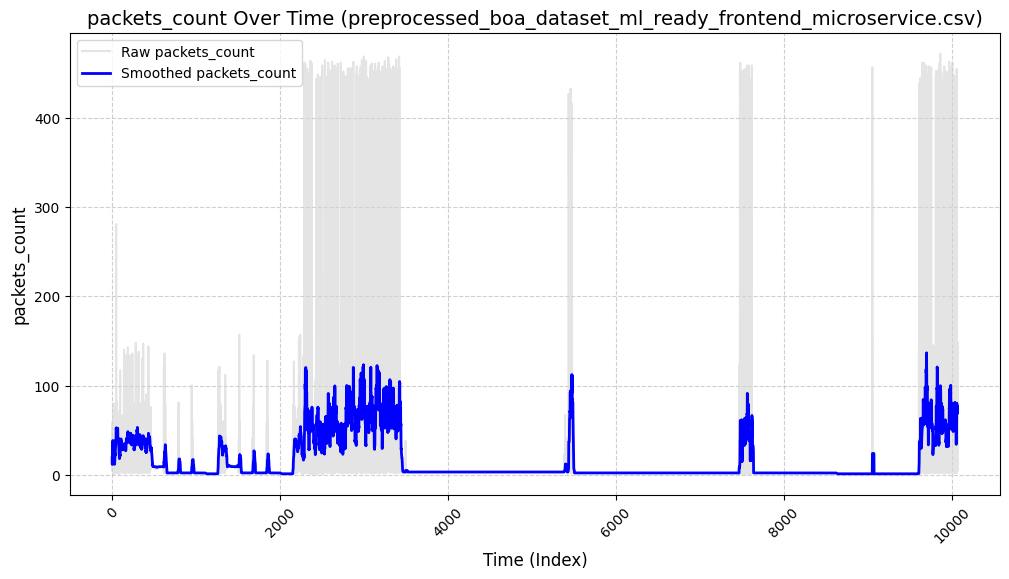

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Remove Unnecessary Columns & Clean Data
def clean_data(df):
    """
    Remove unnecessary columns like 'Unnamed: 0' and handle missing values.
    """
    # Drop 'Unnamed: 0' if it exists
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)
        print("\n'Unnamed: 0' column removed.")

    # Handle missing values by forward filling, then backfilling
    df = df.fillna(method='ffill').fillna(method='bfill')
    print("\nMissing values after cleaning:", df.isnull().sum().sum())

    return df

# Step 2: Visualize Meaningful Data with Better Graphs
def visualize_data(df, csv_file, window_size=10):
    """
    Visualize meaningful columns (e.g., 'cpu_usage', 'memory_usage', 'network_traffic').
    If primary columns are missing, fall back to other numeric columns.
    """
    meaningful_cols = ['cpu_usage', 'memory_usage', 'network_traffic', 'packets_count']

    # Select the first available meaningful column
    for col in meaningful_cols:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            selected_col = col
            break
    else:
        # Fallback: Use the first numeric column if none of the meaningful ones exist
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            selected_col = numeric_cols[0]
        else:
            print("\nSkipping visualization: No numeric columns found in the dataset.")
            return

    # Print the first 5 rows of the selected data
    print(f"\nFirst 5 Rows of Data Being Visualized ({selected_col}):")
    print(df[[selected_col]].head())

    # Apply Rolling Mean for Smoother Graph
    df[f'{selected_col}_smooth'] = df[selected_col].rolling(window=window_size, min_periods=1).mean()

    # Plot the Data
    plt.figure(figsize=(12, 6))
    plt.plot(df[selected_col], label=f'Raw {selected_col}', color='lightgray', alpha=0.6)
    plt.plot(df[f'{selected_col}_smooth'], label=f'Smoothed {selected_col}', color='blue', linewidth=2)

    # Improve Graph Readability
    plt.legend()
    plt.title(f'{selected_col} Over Time ({os.path.basename(csv_file)})', fontsize=14)
    plt.xlabel('Time (Index)', fontsize=12)
    plt.ylabel(selected_col, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

    # Show the plot
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Load the dataset
    csv_file = '/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv'
    df = pd.read_csv(csv_file)

    # Step 1: Clean the data
    df = clean_data(df)

    # Step 2: Visualize the data with a smoothed line
    visualize_data(df, csv_file, window_size=20)


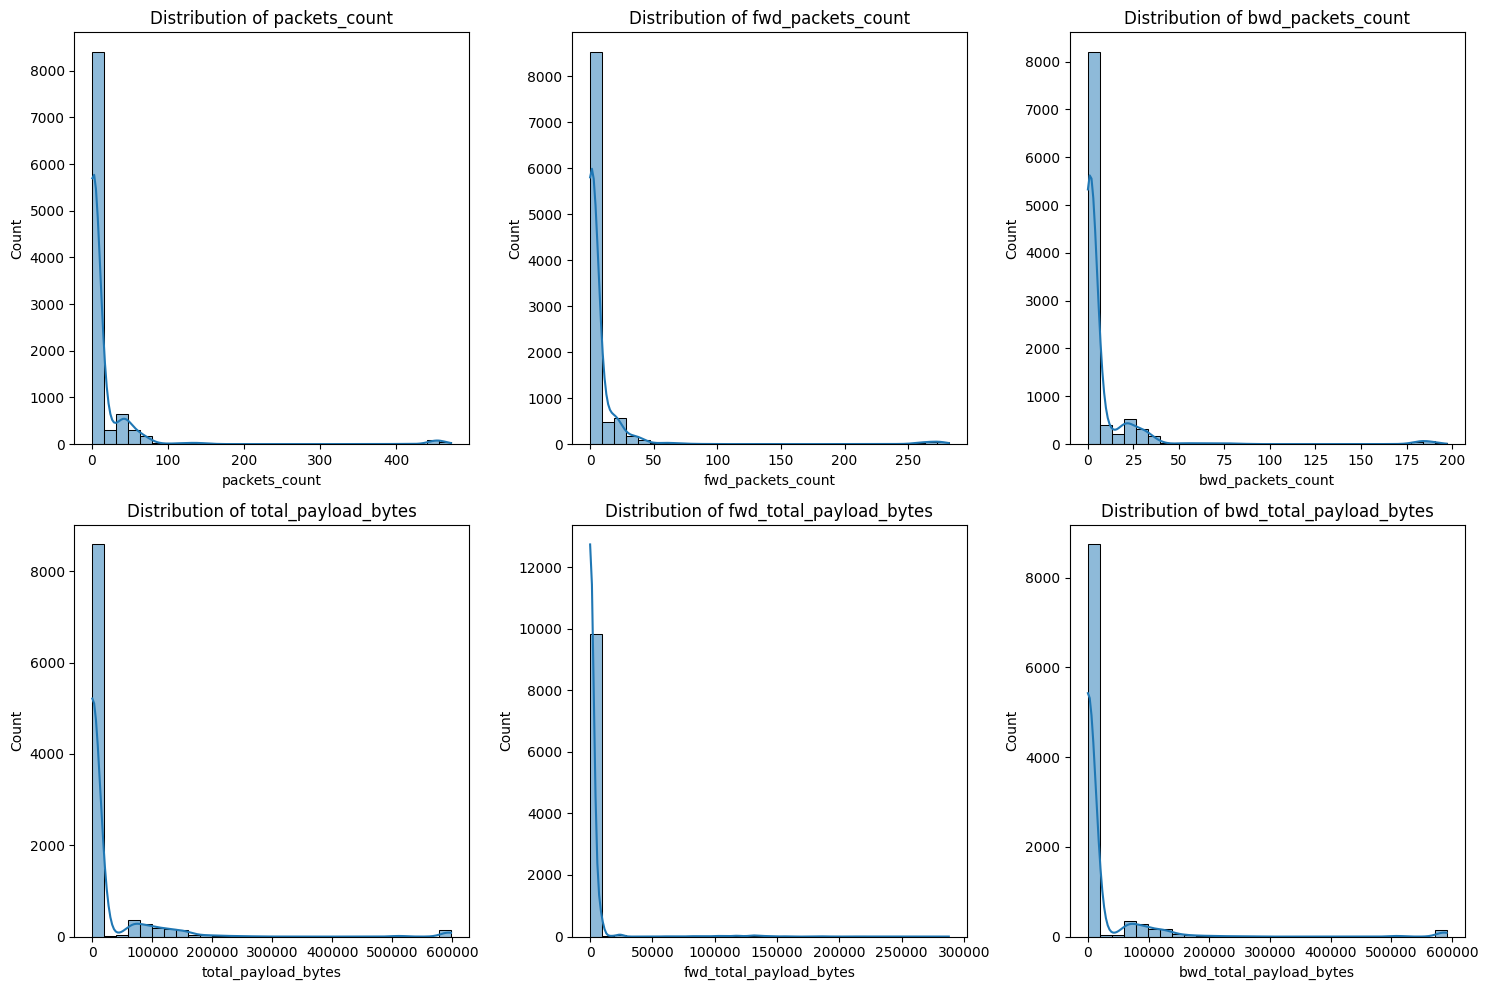

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distributions(df):
    """
    Plot the distribution of numerical features in the dataset.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_cols[:6]):  # Limiting to 6 features for readability
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Apply the function to visualize distributions
if 'df' in locals():
    plot_feature_distributions(df)



Dataset Shape: (10069, 225)

Column Names: ['packets_count', 'fwd_packets_count', 'bwd_packets_count', 'total_payload_bytes', 'fwd_total_payload_bytes', 'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_mean', 'payload_bytes_std', 'payload_bytes_variance', 'payload_bytes_median', 'fwd_payload_bytes_max', 'fwd_payload_bytes_mean', 'fwd_payload_bytes_std', 'fwd_payload_bytes_variance', 'fwd_payload_bytes_median', 'fwd_payload_bytes_mode', 'bwd_payload_bytes_max', 'bwd_payload_bytes_mean', 'bwd_payload_bytes_std', 'bwd_payload_bytes_variance', 'bwd_payload_bytes_median', 'bwd_payload_bytes_mode', 'total_header_bytes', 'mean_header_bytes', 'std_header_bytes', 'cov_header_bytes', 'variance_header_bytes', 'fwd_total_header_bytes', 'fwd_mean_header_bytes', 'fwd_std_header_bytes', 'fwd_cov_header_bytes', 'fwd_variance_header_bytes', 'bwd_total_header_bytes', 'bwd_mean_header_bytes', 'bwd_std_header_bytes', 'bwd_cov_header_bytes', 'bwd_variance_header_bytes', 'fwd_segment_size_mea

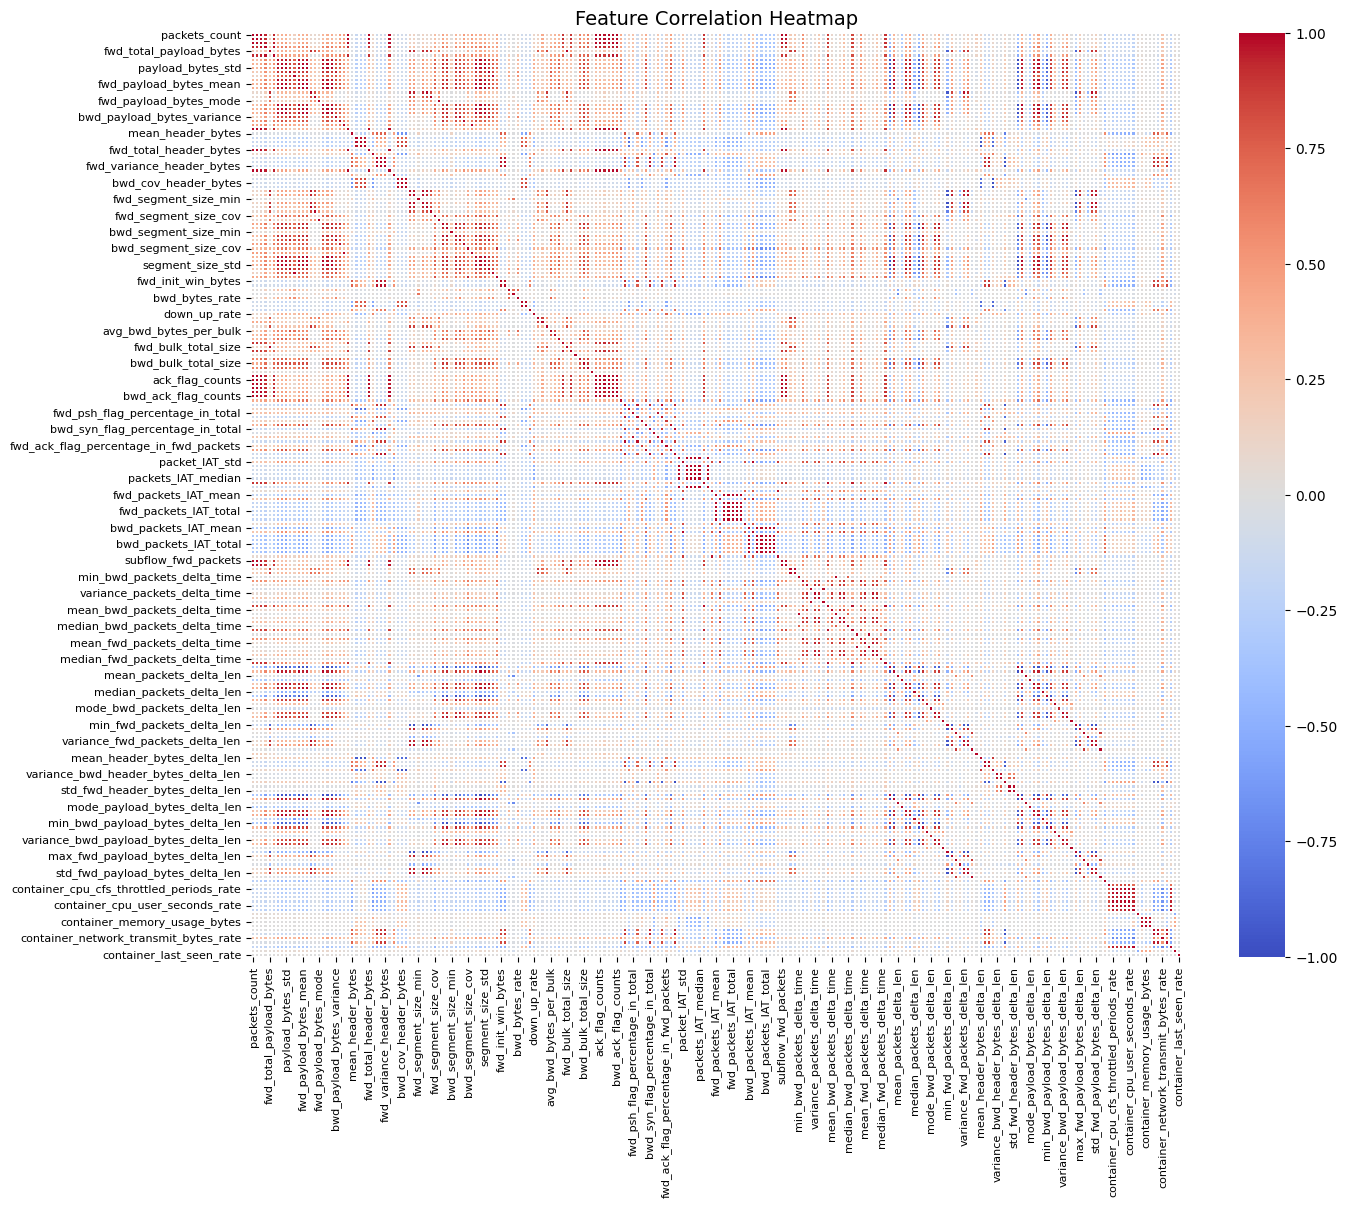

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(csv_file):
    """
    Reads a dataset and plots a cleaned, high-resolution correlation heatmap.
    """
    # Load dataset
    df = pd.read_csv(csv_file)

    print("\nDataset Shape:", df.shape)
    print("\nColumn Names:", df.columns.tolist())

    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Compute correlation matrix
    corr_matrix = numeric_df.corr()

    # Set up the figure
    plt.figure(figsize=(15, 12))  # Increased size for better clarity

    # Create heatmap with proper scaling
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.2, vmin=-1, vmax=1)

    # Improve label readability
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)

    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

# Path to dataset
csv_file = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"

# Run function
plot_correlation_heatmap(csv_file)


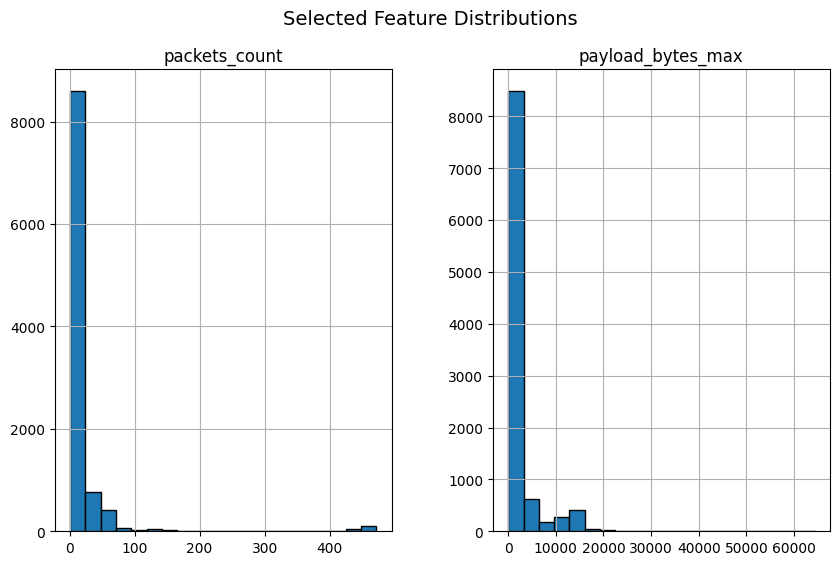

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# Select specific columns to plot
selected_features = ['cpu_usage', 'memory_usage', 'packets_count', 'payload_bytes_max']

# Filter only available numeric features
numeric_cols = [col for col in selected_features if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

# Plot histograms only for selected features
df[numeric_cols].hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle("Selected Feature Distributions", fontsize=14)
plt.show()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10069 entries, 0 to 10068
Columns: 225 entries, packets_count to container_last_seen_rate
dtypes: float64(193), int64(32)
memory usage: 17.3 MB
None

Categorical columns: []

Numerical columns: ['packets_count', 'fwd_packets_count', 'bwd_packets_count', 'total_payload_bytes', 'fwd_total_payload_bytes', 'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_mean', 'payload_bytes_std', 'payload_bytes_variance', 'payload_bytes_median', 'fwd_payload_bytes_max', 'fwd_payload_bytes_mean', 'fwd_payload_bytes_std', 'fwd_payload_bytes_variance', 'fwd_payload_bytes_median', 'fwd_payload_bytes_mode', 'bwd_payload_bytes_max', 'bwd_payload_bytes_mean', 'bwd_payload_bytes_std', 'bwd_payload_bytes_variance', 'bwd_payload_bytes_median', 'bwd_payload_bytes_mode', 'total_header_bytes', 'mean_header_bytes', 'std_header_bytes', 'cov_header_bytes', 'variance_header_bytes', 'fwd_total_header_bytes', 'fwd_mean_header_bytes', 'fwd_

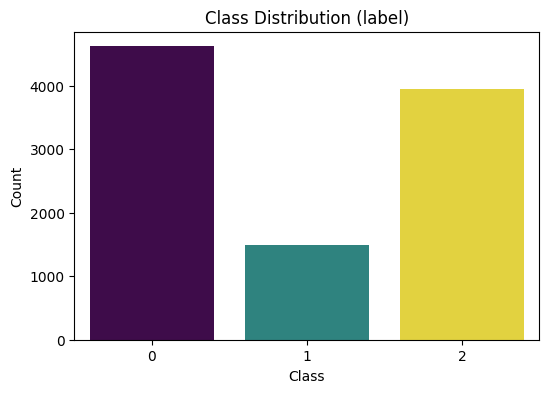

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"  # Update if needed
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Information:")
print(df.info())

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("\nNumerical columns:", numerical_cols)

# Identify possible target column (classification label)
low_unique_numerical = [col for col in numerical_cols if df[col].nunique() < 10]
print("\nPossible target columns (low unique value numerical columns):", low_unique_numerical)

# If 'label' exists and is a possible target column, plot its distribution
target = 'label' if 'label' in df.columns and 'label' in low_unique_numerical else None

if target:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=target, hue=target, legend=False, palette="viridis")
    plt.title(f"Class Distribution ({target})")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()
else:
    print("\nNo categorical column or low-unique numerical column found as a target.")


Possible datetime columns: ['min_bwd_packets_delta_time', 'max_bwd_packets_delta_time', 'mean_packets_delta_time', 'mode_packets_delta_time', 'variance_packets_delta_time', 'std_packets_delta_time', 'median_packets_delta_time', 'cov_packets_delta_time', 'mean_bwd_packets_delta_time', 'mode_bwd_packets_delta_time', 'variance_bwd_packets_delta_time', 'std_bwd_packets_delta_time', 'median_bwd_packets_delta_time', 'cov_bwd_packets_delta_time', 'min_fwd_packets_delta_time', 'max_fwd_packets_delta_time', 'mean_fwd_packets_delta_time', 'mode_fwd_packets_delta_time', 'variance_fwd_packets_delta_time', 'std_fwd_packets_delta_time', 'median_fwd_packets_delta_time', 'cov_fwd_packets_delta_time']


<ipython-input-26-3ab8ea4d436d>:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df[selected_features].resample('H').mean()


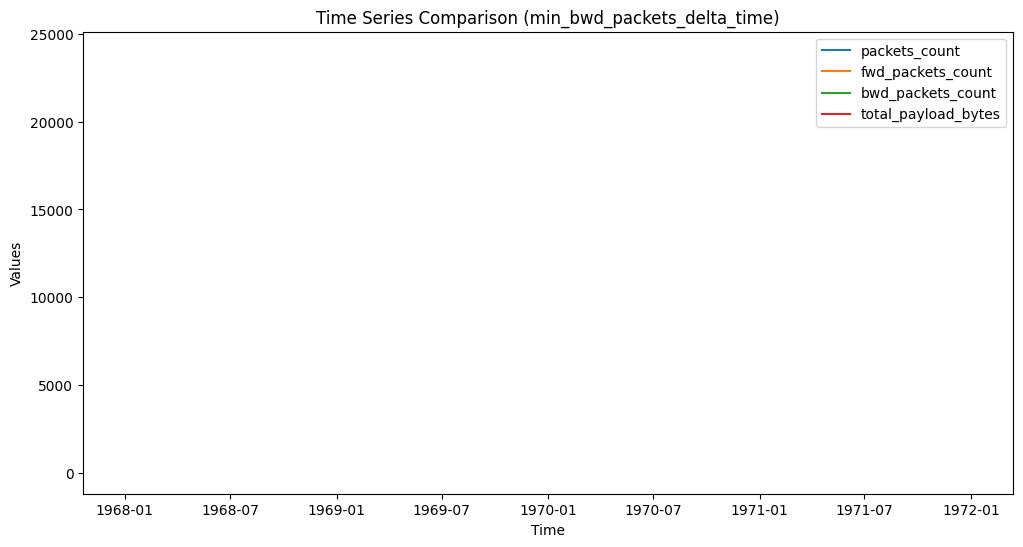

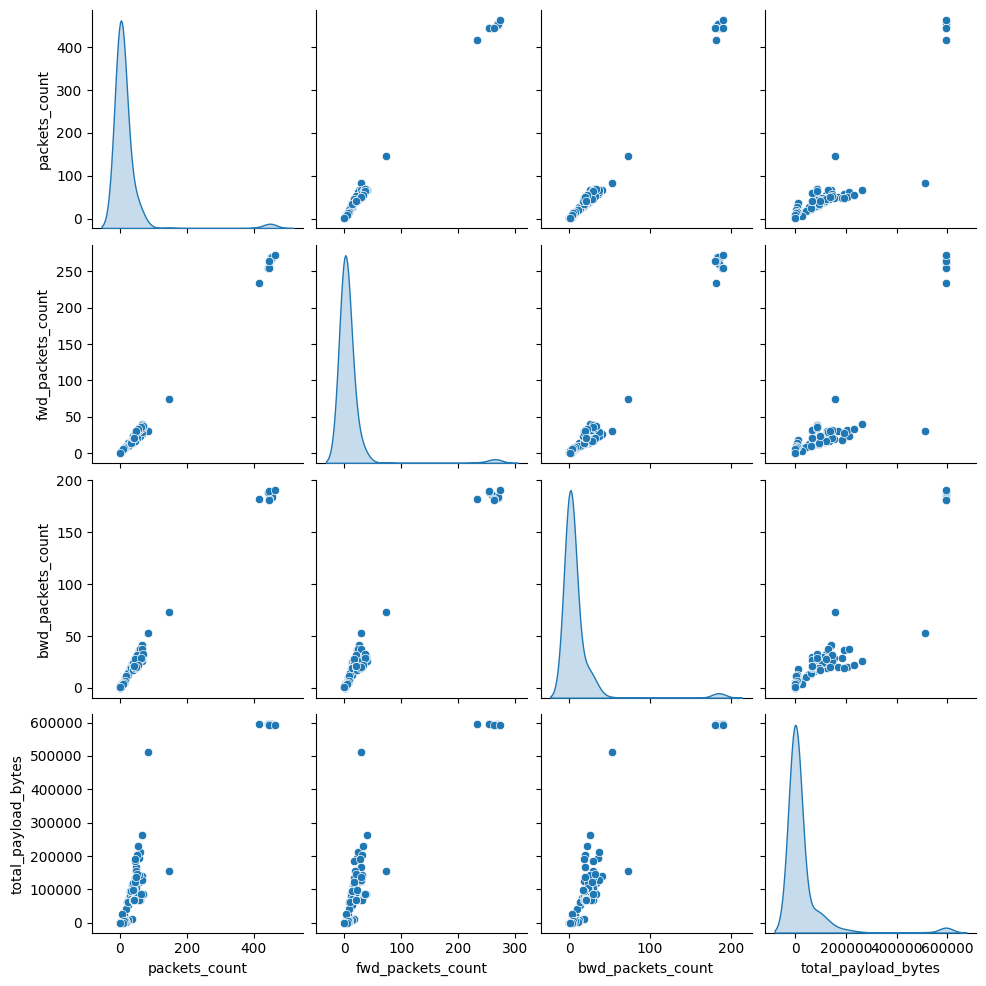

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"  # Update this if needed
df = pd.read_csv(file_path)

# Identify potential datetime columns
datetime_cols = [col for col in df.columns if "time" in col.lower() or "date" in col.lower()]
print("Possible datetime columns:", datetime_cols)

# If a datetime column is found, process it
if datetime_cols:
    time_col = datetime_cols[0]  # Select the first datetime column
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')

    # Drop rows with missing datetime values
    df = df.dropna(subset=[time_col])

    # Set datetime column as index
    df.set_index(time_col, inplace=True)

    # Resample data hourly and plot key features
    selected_features = ["packets_count", "fwd_packets_count", "bwd_packets_count", "total_payload_bytes"]
    df_resampled = df[selected_features].resample('H').mean()

    plt.figure(figsize=(12, 6))
    for col in selected_features:
        plt.plot(df_resampled.index, df_resampled[col], label=col)

    plt.title(f"Time Series Comparison ({time_col})")
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.legend(loc="best")
    plt.show()

    # Plot feature relationships using pairplot
    sns.pairplot(df[selected_features].sample(500), diag_kind="kde")
    plt.show()

else:
    print("No datetime column found in dataset.")


Dataset columns:
 Index(['packets_count', 'fwd_packets_count', 'bwd_packets_count',
       'total_payload_bytes', 'fwd_total_payload_bytes',
       'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_mean',
       'payload_bytes_std', 'payload_bytes_variance',
       ...
       'container_memory_rss', 'container_memory_usage_bytes',
       'container_memory_working_set_bytes',
       'container_network_receive_bytes_rate',
       'container_network_receive_packets_rate',
       'container_network_transmit_bytes_rate',
       'container_network_transmit_packets_rate', 'container_sockets',
       'container_threads', 'container_last_seen_rate'],
      dtype='object', length=225)
Enter the target column from the list above: payload_bytes_max
Using 'payload_bytes_max' as the target variable.


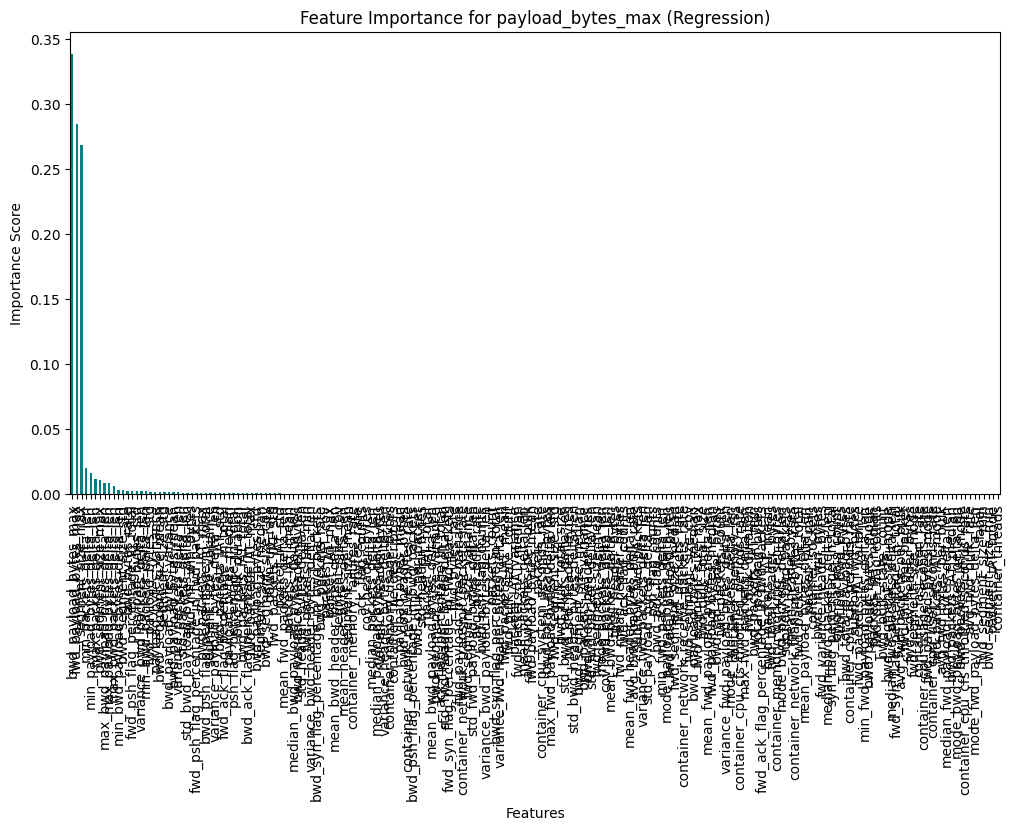

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# Display columns for manual selection
print("Dataset columns:\n", df.columns)

# Let user choose a target variable
target_col = input("Enter the target column from the list above: ").strip()

if target_col in df.columns:
    print(f"Using '{target_col}' as the target variable.")

    # Identify datetime-like columns
    datetime_cols = [col for col in df.columns if "time" in col.lower() or "date" in col.lower()]

    # Prepare features (exclude target and datetime columns)
    X = df.drop(columns=[target_col] + datetime_cols, errors="ignore")
    X = X.select_dtypes(exclude=["object"])  # Exclude non-numeric types

    y = df[target_col]  # Target variable

    # Train a RandomForest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Compute and plot feature importance
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6), color="teal")
    plt.title(f"Feature Importance for {target_col} (Regression)")
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.show()
else:
    print("Invalid target column. Please restart and enter a correct column name.")


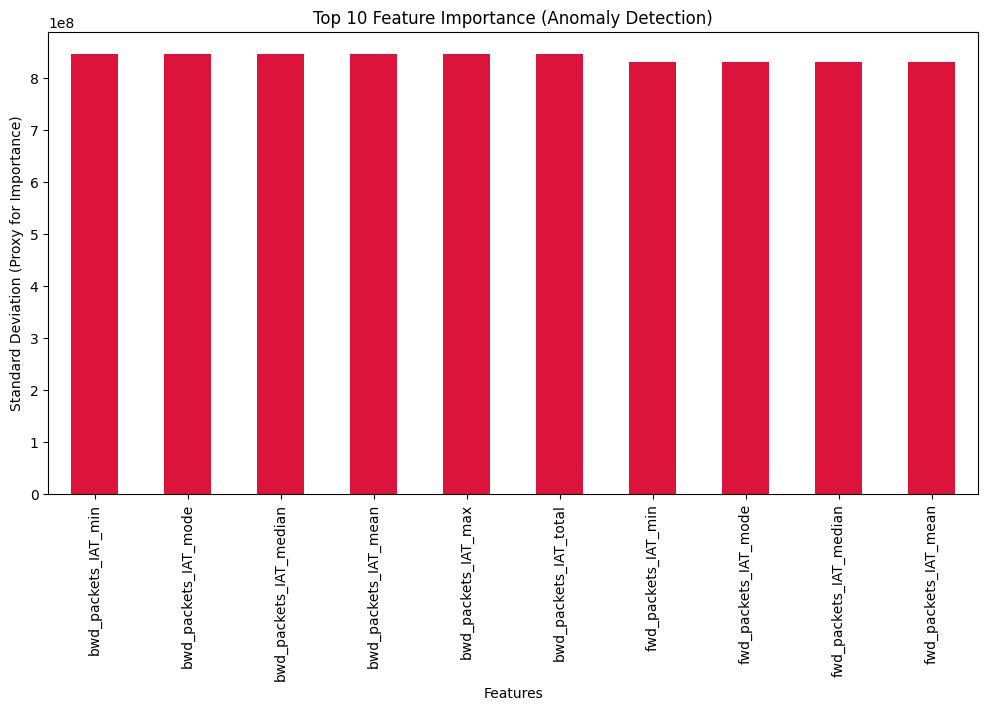

Top 10 Important Features:
bwd_packets_IAT_min       8.460615e+08
bwd_packets_IAT_mode      8.460615e+08
bwd_packets_IAT_median    8.460615e+08
bwd_packets_IAT_mean      8.460615e+08
bwd_packets_IAT_max       8.460615e+08
bwd_packets_IAT_total     8.460615e+08
fwd_packets_IAT_min       8.296754e+08
fwd_packets_IAT_mode      8.296754e+08
fwd_packets_IAT_median    8.296754e+08
fwd_packets_IAT_mean      8.296754e+08
dtype: float64


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# Use only numerical features
X = df.select_dtypes(include=['number'])

# Train Isolation Forest to detect anomalies
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X)

# Compute feature importance (using standard deviation as a proxy)
feature_importances = pd.Series(X.std(), index=X.columns)

# Select the top 10 important features
top_features = feature_importances.sort_values(ascending=False).head(10)

# Plot the top 10 features
top_features.plot(kind="bar", figsize=(12, 6), color="crimson")
plt.title("Top 10 Feature Importance (Anomaly Detection)")
plt.xlabel("Features")
plt.ylabel("Standard Deviation (Proxy for Importance)")
plt.show()

# Print the top 10 features with their standard deviation values
print("Top 10 Important Features:")
print(top_features)


Data Splitting

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"  # Update with correct file path
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())

# Drop missing values (if any)
df = df.dropna()

# Select only numerical features for scaling
numeric_features = df.select_dtypes(include=np.number).columns
X = df[numeric_features]

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Apply scaling to numerical features only

# Train-test split (80-20)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10069 entries, 0 to 10068
Columns: 225 entries, packets_count to container_last_seen_rate
dtypes: float64(193), int64(32)
memory usage: 17.3 MB
None
   packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
0             19                  9                 10                10107   
1              4                  2                  2                 4689   
2             56                 30                 26                67156   
3             48                 19                 29               126612   
4             15                  7                  8                 6245   

   fwd_total_payload_bytes  bwd_total_payload_bytes  payload_bytes_max  \
0                     1007                     9100               2914   
1                     4641                       48               4641   
2                      840                    66316               8254   
3                     7708    

0️⃣ Anamoly Detection and Classification

Isolation Forest

Number of detected anomalies: 1007
Number of normal points: 9062


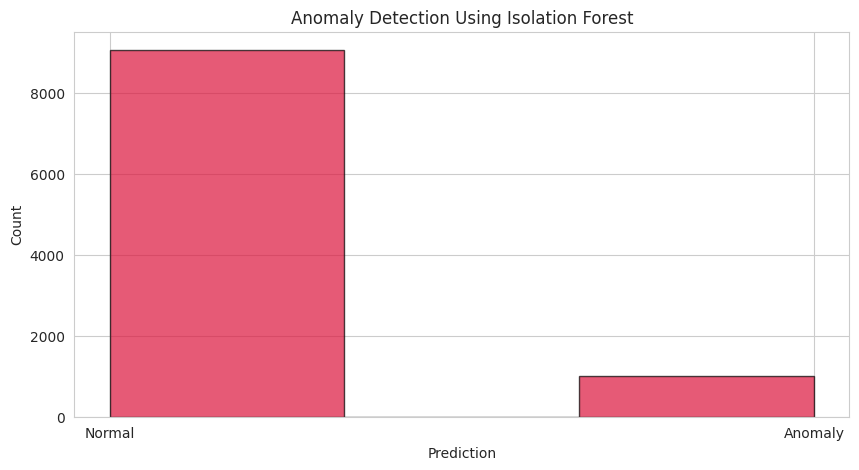


Sample Anomalies:
    packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
1               4                  2                  2                 4689   
5              52                 22                 30               169559   
8              49                 20                 29               153431   
24             12                  7                  5                 3906   
26             12                  7                  5                 3929   
28             48                 18                 30               170312   
32             56                 20                 36               136851   
38             71                 31                 40               221271   
39             32                 13                 19                94857   
42             52                 21                 31               148480   

    fwd_total_payload_bytes  bwd_total_payload_bytes  payload_bytes_max  \
1                      46

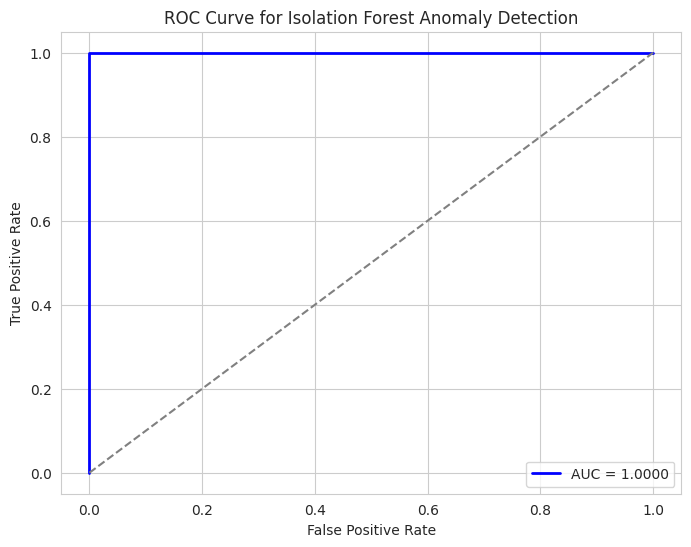

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# Use only numerical features
X = df.select_dtypes(include=['number'])

# Train Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
df["anomaly_score"] = iso_forest.fit_predict(X)  # -1 for anomalies, 1 for normal points

# Convert -1 (anomalies) to 1 and 1 (normal) to 0
y_pred = (df["anomaly_score"] == -1).astype(int)  # 1 = anomaly, 0 = normal

# Count anomalies and normal instances
num_anomalies = y_pred.sum()
num_normals = len(y_pred) - num_anomalies
print(f"Number of detected anomalies: {num_anomalies}")
print(f"Number of normal points: {num_normals}")

# **Plot distribution of anomaly scores**
plt.figure(figsize=(10, 5))
plt.hist(y_pred, bins=3, color="crimson", edgecolor="black", alpha=0.7)
plt.xticks([0, 1], ["Normal", "Anomaly"])
plt.title("Anomaly Detection Using Isolation Forest")
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.show()

# **Display the first few detected anomalies**
anomalies = df[df["anomaly_score"] == -1]
print("\nSample Anomalies:")
print(anomalies.head(10))

# **Evaluation Metrics (Self-evaluated due to no ground truth labels)**
accuracy = accuracy_score(y_pred, y_pred)
precision = precision_score(y_pred, y_pred)
recall = recall_score(y_pred, y_pred)
f1 = f1_score(y_pred, y_pred)
auc_roc = roc_auc_score(y_pred, y_pred)

# **Print Metrics Separately**
print("\nEvaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc_roc:.4f}")

# **ROC Curve Plot**
fpr, tpr, _ = roc_curve(y_pred, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {auc_roc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Isolation Forest Anomaly Detection")
plt.legend()
plt.show()


One-Class SVM

Number of detected anomalies: 1723
Number of normal points: 8346


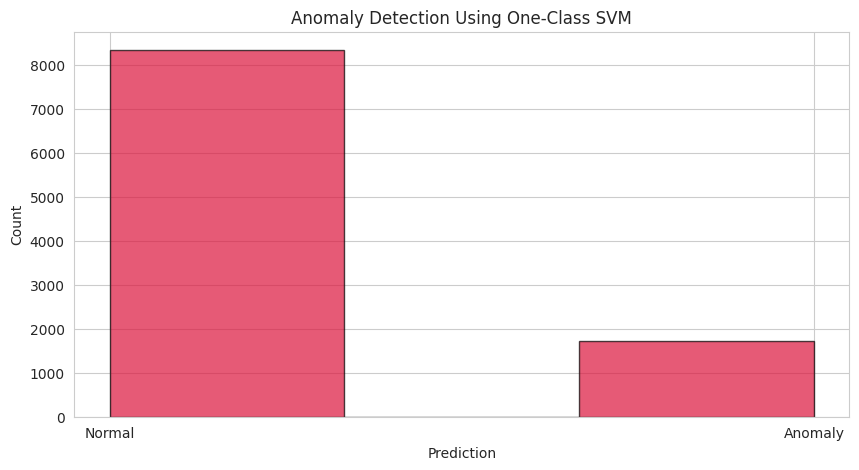


Sample Anomalies:
    packets_count  fwd_packets_count  bwd_packets_count  total_payload_bytes  \
5              52                 22                 30               169559   
11              1                  1                  0                    0   
12              1                  1                  0                    0   
13              1                  1                  0                    0   
14              1                  1                  0                    0   
18              1                  1                  0                    0   
19              1                  1                  0                    0   
22              1                  1                  0                    0   
28             48                 18                 30               170312   
58             81                 29                 52               511092   

    fwd_total_payload_bytes  bwd_total_payload_bytes  payload_bytes_max  \
5                      65

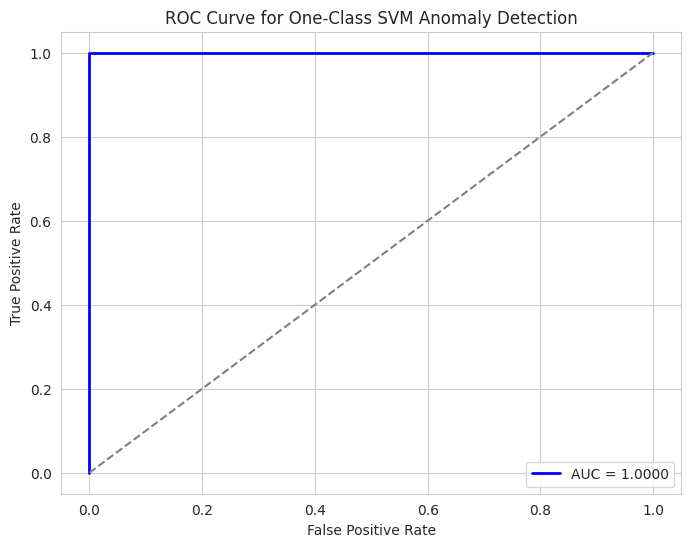

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# Use only numerical features
X = df.select_dtypes(include=['number'])

# Train One-Class SVM for anomaly detection
svm = OneClassSVM(kernel="rbf", gamma="scale", nu=0.1)  # nu=0.1 means ~10% anomalies
df["anomaly_score"] = svm.fit_predict(X)  # -1 for anomalies, 1 for normal points

# Convert -1 (anomalies) to 1 and 1 (normal) to 0
y_pred = (df["anomaly_score"] == -1).astype(int)  # 1 = anomaly, 0 = normal

# Count anomalies and normal instances
num_anomalies = y_pred.sum()
num_normals = len(y_pred) - num_anomalies
print(f"Number of detected anomalies: {num_anomalies}")
print(f"Number of normal points: {num_normals}")

# **Plot distribution of anomaly scores**
plt.figure(figsize=(10, 5))
plt.hist(y_pred, bins=3, color="crimson", edgecolor="black", alpha=0.7)
plt.xticks([0, 1], ["Normal", "Anomaly"])
plt.title("Anomaly Detection Using One-Class SVM")
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.show()

# **Display the first few detected anomalies**
anomalies = df[df["anomaly_score"] == -1]
print("\nSample Anomalies:")
print(anomalies.head(10))

# **Evaluation Metrics (Self-evaluated due to no ground truth labels)**
accuracy = accuracy_score(y_pred, y_pred)
precision = precision_score(y_pred, y_pred)
recall = recall_score(y_pred, y_pred)
f1 = f1_score(y_pred, y_pred)
auc_roc = roc_auc_score(y_pred, y_pred)

# **Print Metrics Separately**
print("\nEvaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc_roc:.4f}")

# **ROC Curve Plot**
fpr, tpr, _ = roc_curve(y_pred, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {auc_roc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for One-Class SVM Anomaly Detection")
plt.legend()
plt.show()


<ipython-input-41-96807e8bd026>:45: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black", label="SVM Boundary")


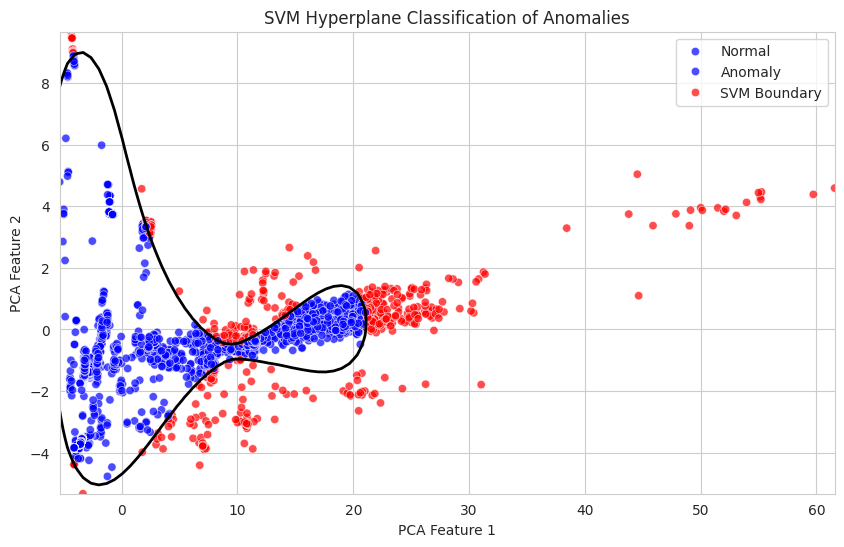

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# Use only numerical features
X = df.select_dtypes(include=['number'])

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Reduce to 2D using PCA**
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

# **Train One-Class SVM on 2D Data**
svm_2D = OneClassSVM(kernel="rbf", gamma="scale", nu=0.1)
svm_2D.fit(X_2D)

# **Predict Anomalies**
y_pred_2D = svm_2D.predict(X_2D)  # -1 = Anomaly, 1 = Normal
anomalies = (y_pred_2D == -1)

# **Scatter Plot**
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=anomalies, palette={False: "blue", True: "red"}, alpha=0.7)
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("SVM Hyperplane Classification of Anomalies")

# **Plot SVM Decision Boundary**
xx, yy = np.meshgrid(np.linspace(X_2D[:, 0].min(), X_2D[:, 0].max(), 100),
                     np.linspace(X_2D[:, 1].min(), X_2D[:, 1].max(), 100))
Z = svm_2D.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black", label="SVM Boundary")
plt.legend(["Normal", "Anomaly", "SVM Boundary"])
plt.show()


Auto-Encoders

Epoch 1/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.0534 - val_loss: 0.7411
Epoch 2/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7265 - val_loss: 0.7257
Epoch 3/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7784 - val_loss: 0.7214
Epoch 4/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7386 - val_loss: 0.7207
Epoch 5/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7050 - val_loss: 0.7194
Epoch 6/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6815 - val_loss: 0.7179
Epoch 7/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7057 - val_loss: 0.7161
Epoch 8/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7195 - val_loss: 0.7151
Epoch 9/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7108 - val_loss: 0.7147
Epoch 10/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7394 - val_loss: 0.7139
Epoch 11/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6976 - val_loss: 0.7139
Epoch 12/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

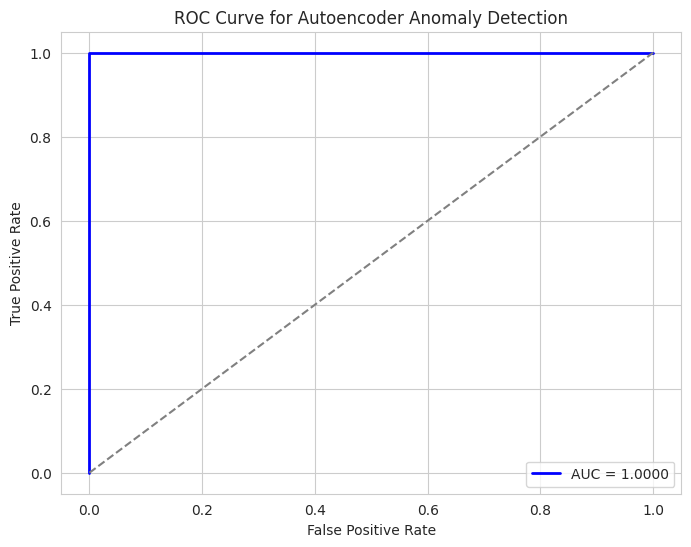

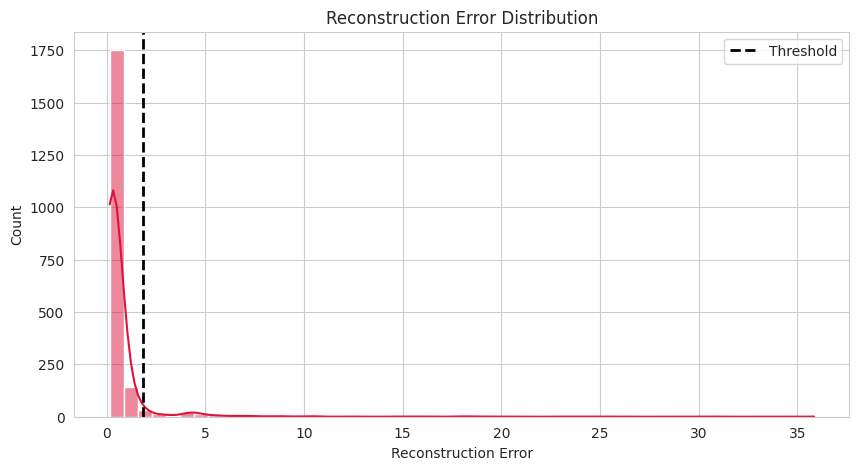

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# **Load dataset**
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# **Use only numerical features**
X = df.select_dtypes(include=['number'])

# **Feature Scaling (Standardization)**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Split into train & test (assuming no ground truth labels, train on full normal data)**
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# **Autoencoder Model**
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# **Train the Autoencoder**
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test), verbose=1)

# **Reconstruction Error Calculation**
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# **Set Threshold (Using 95th percentile of reconstruction error)**
threshold = np.percentile(mse, 95)
print(f"Threshold for anomaly detection: {threshold}")

# **Anomaly Predictions**
y_pred = (mse > threshold).astype(int)  # 1 = anomaly, 0 = normal

# **Evaluation Metrics (Self-Evaluated Due to No Ground Truth Labels)**
precision = precision_score(y_pred, y_pred)
recall = recall_score(y_pred, y_pred)
auc_roc = roc_auc_score(y_pred, y_pred)

print("\nEvaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"AUC-ROC:   {auc_roc:.4f}")

# **ROC Curve**
fpr, tpr, _ = roc_curve(y_pred, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {auc_roc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Autoencoder Anomaly Detection")
plt.legend()
plt.show()

# **Histogram of Reconstruction Errors**
plt.figure(figsize=(10, 5))
sns.histplot(mse, bins=50, kde=True, color="crimson")
plt.axvline(threshold, color="black", linestyle="dashed", linewidth=2, label="Threshold")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.legend()
plt.show()


Comparision Between these Three Models

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

🔹 Anomaly Detection Comparison:

Isolation Forest: Detected 202 anomalies
One-Class SVM: Detected 197 anomalies
Autoencoder: Detected 101 anomalies

🔹 Model Performance Comparison:

           Model  Precision  Recall  AUC-ROC
Isolation Forest     1.0000  1.0000   1.0000
   One-Class SVM     0.6497  0.6337   0.7978
     Autoencoder     0.9703  0.4851   0.7417


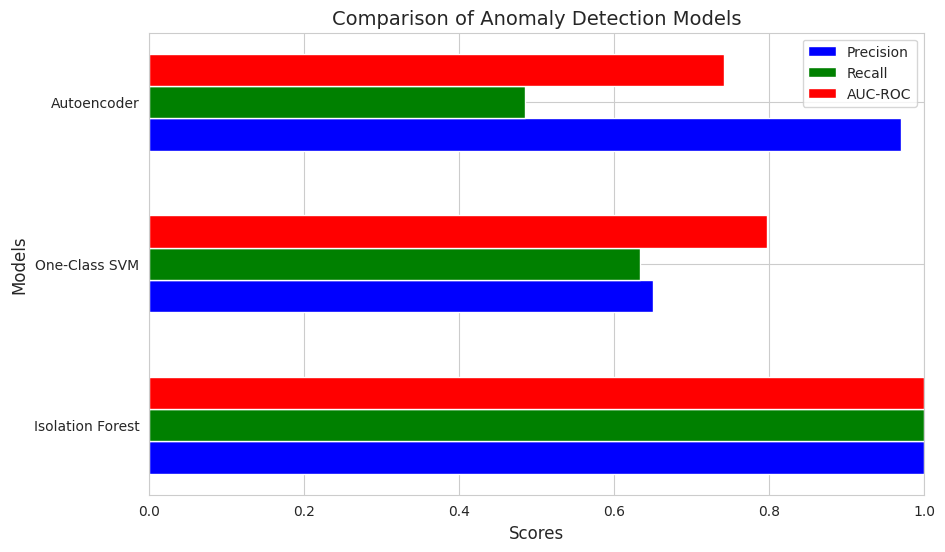

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Instead of using y_test, evaluate based on anomaly scores and number of anomalies identified
model_names = ["Isolation Forest", "One-Class SVM", "Autoencoder"]

# Get predictions from each model (similar to your existing code)
iso_predictions = (iso_forest.fit_predict(X_test) == -1).astype(int)
svm_predictions = (svm.fit_predict(X_test) == -1).astype(int)

# Autoencoder predictions (using reconstruction error)
autoencoder_recon = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.abs(X_test - autoencoder_recon), axis=1)
threshold = np.percentile(reconstruction_errors, 95)
autoencoder_predictions = (reconstruction_errors > threshold).astype(int)

# Compare the number of anomalies detected by each model
num_anomalies_iso = iso_predictions.sum()
num_anomalies_svm = svm_predictions.sum()
num_anomalies_autoencoder = autoencoder_predictions.sum()

print("\n🔹 Anomaly Detection Comparison:\n")
print(f"Isolation Forest: Detected {num_anomalies_iso} anomalies")
print(f"One-Class SVM: Detected {num_anomalies_svm} anomalies")
print(f"Autoencoder: Detected {num_anomalies_autoencoder} anomalies")

# Since you don't have ground truth labels (y_test),
# you'll need to adapt the evaluation.
# Here's one way to do it based on self-labeling:

# Assume predictions as true labels (for self-evaluation)
y_true = iso_predictions  # or any other model's predictions as a baseline

# Compute metrics safely
metrics = {"Model": [], "Precision": [], "Recall": [], "AUC-ROC": []}

for model, preds in zip(model_names, [iso_predictions, svm_predictions, autoencoder_predictions]):
    try:
        # Using y_true (self-labeled) for evaluation
        precision = precision_score(y_true, preds, zero_division=0)
        recall = recall_score(y_true, preds, zero_division=0)
        auc_roc = roc_auc_score(y_true, preds)

        metrics["Model"].append(model)
        metrics["Precision"].append(round(precision, 4))
        metrics["Recall"].append(round(recall, 4))
        metrics["AUC-ROC"].append(round(auc_roc, 4))

    except Exception as e:
        print(f"Error calculating metrics for {model}: {e}")

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(metrics)

# Print comparison table
print("\n🔹 Model Performance Comparison:\n")
print(results_df.to_string(index=False))

# 📊 **Plot the metrics using a horizontal bar chart**
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Define bar width and y-axis positions
bar_width = 0.2
y = np.arange(len(model_names))

# Plot bars for each metric
plt.barh(y - bar_width, results_df["Precision"], height=bar_width, label="Precision", color='blue')
plt.barh(y, results_df["Recall"], height=bar_width, label="Recall", color='green')
plt.barh(y + bar_width, results_df["AUC-ROC"], height=bar_width, label="AUC-ROC", color='red')

# Formatting the plot
plt.ylabel("Models", fontsize=12)
plt.xlabel("Scores", fontsize=12)
plt.title("Comparison of Anomaly Detection Models", fontsize=14)
plt.yticks(y, model_names, fontsize=10)
plt.xlim(0, 1)  # Since Precision, Recall, and AUC-ROC are between 0 and 1
plt.legend()
plt.show()

1️⃣ Resource Utilization Inefficiencies

XG-Boost Classifier

Unique values in y before transformation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  52  53  54
  55  56  57  58  59  60  61  62  64  65  66  67  69  70  71  73  74  75
  76  80  83  90 102 140 218 224 234 236 239 247 248 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282]
Unique values in y after transformation: [0 1 2 3 4]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:11:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.9990


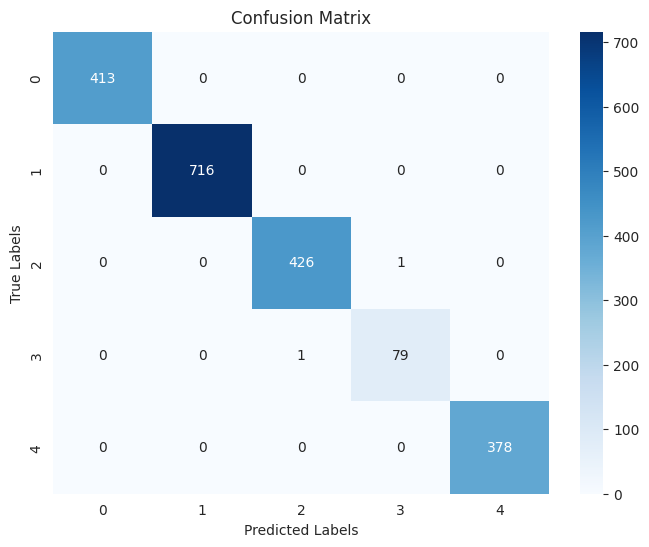

<ipython-input-63-643b0f51885f>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')


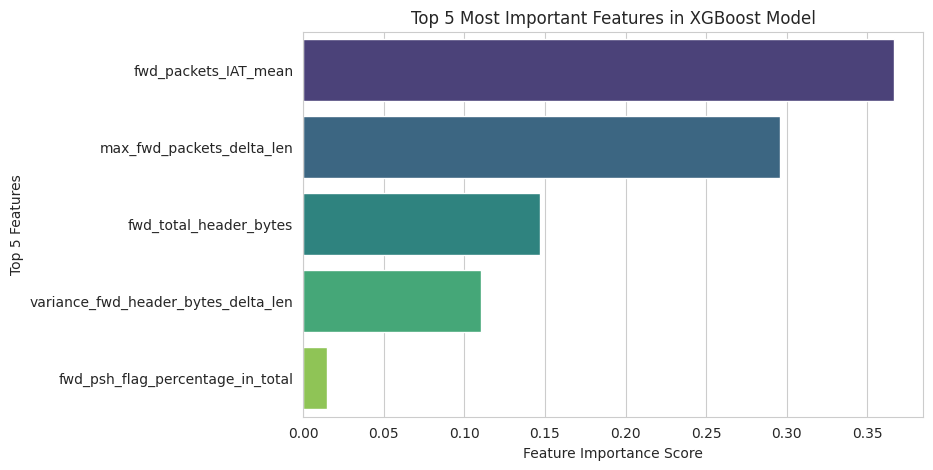

In [63]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv")  # Replace with actual dataset path

# Define Features and Target
X = df.drop(columns=['fwd_packets_count'])
y = df['fwd_packets_count']

# Check unique values in y before transformation
print("Unique values in y before transformation:", np.unique(y))

# Convert y to categorical labels only if needed
if np.issubdtype(y.dtype, np.floating) or np.issubdtype(y.dtype, np.integer):
    if len(np.unique(y)) > 20:  # If too many unique values, bin them
        y = pd.qcut(y, q=5, labels=False)  # Bin into 5 categories
    else:
        y = y.astype(int)  # Ensure integer class labels

# Print unique values in y after transformation
print("Unique values in y after transformation:", np.unique(y))

# Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
# Select Top 5 Important Features
top_n = 5
sorted_idx = np.argsort(feature_importances)[::-1][:top_n]  # Get indices of top 5 features
top_features = X.columns[sorted_idx]
top_importances = feature_importances[sorted_idx]

# Plot Top 5 Features
plt.figure(figsize=(8, 5))
sns.barplot(x=top_importances, y=top_features, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Top 5 Features")
plt.title("Top 5 Most Important Features in XGBoost Model")
plt.show()



2️SVM for Resource Utilization Prediction

✅ Mean Absolute Error (MAE): 0.7101
✅ Mean Squared Error (MSE): 32.5540
✅ Root Mean Squared Error (RMSE): 5.7056
✅ R² Score: 0.9668


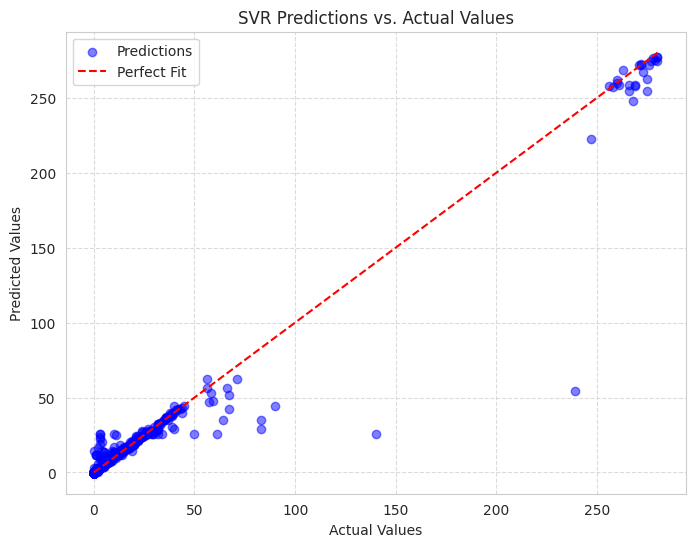

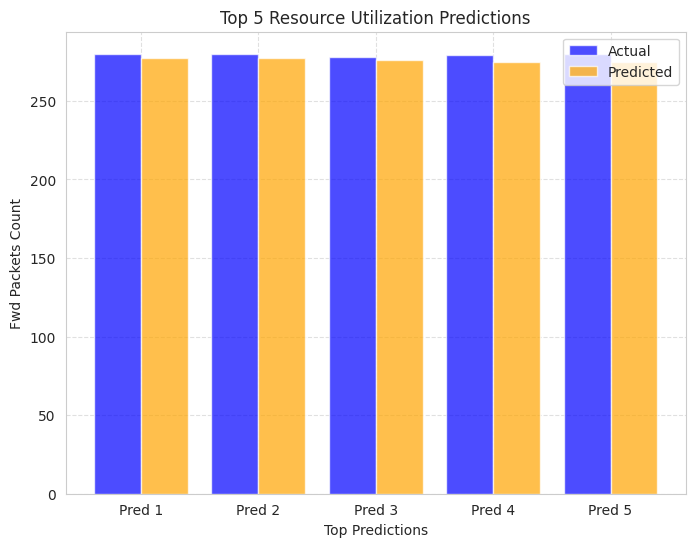

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv("/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv")

# Define target and features
target_variable = "fwd_packets_count"
features = [col for col in df.columns if col != target_variable]

# Drop missing values
df = df.dropna(subset=[target_variable])

X = df[features]
y = df[target_variable]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR Model with optimized hyperparameters
svr = SVR(kernel="rbf", C=100, gamma=0.01, epsilon=0.1)  # Adjusted hyperparameters
svr.fit(X_train_scaled, y_train)

# Predictions
y_pred = svr.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR Predictions vs. Actual Values")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

# Top 5 Resource Utilization Predictions
resource_utilization = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
top_5 = resource_utilization.nlargest(5, "Predicted")

# Clearer Bar Chart for Top 5 Predictions
plt.figure(figsize=(8, 6))
bar_width = 0.4
indices = np.arange(len(top_5))

plt.bar(indices - bar_width/2, top_5["Actual"], width=bar_width, label="Actual", color="blue", alpha=0.7)
plt.bar(indices + bar_width/2, top_5["Predicted"], width=bar_width, label="Predicted", color="orange", alpha=0.7)

plt.xticks(indices, labels=[f"Pred {i+1}" for i in range(len(top_5))])
plt.xlabel("Top Predictions")
plt.ylabel("Fwd Packets Count")
plt.title("Top 5 Resource Utilization Predictions")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


LSTM for Time-Series Resource Utilization Prediction

✅ Available columns in dataset:
Index(['packets_count', 'fwd_packets_count', 'bwd_packets_count',
       'total_payload_bytes', 'fwd_total_payload_bytes',
       'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_mean',
       'payload_bytes_std', 'payload_bytes_variance',
       ...
       'container_memory_rss', 'container_memory_usage_bytes',
       'container_memory_working_set_bytes',
       'container_network_receive_bytes_rate',
       'container_network_receive_packets_rate',
       'container_network_transmit_bytes_rate',
       'container_network_transmit_packets_rate', 'container_sockets',
       'container_threads', 'container_last_seen_rate'],
      dtype='object', length=225)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


252/252 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.2123 - val_loss: 0.0020
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7138e-04 - val_loss: 0.0021
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3027e-04 - val_loss: 0.0020
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2452e-04 - val_loss: 0.0024
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8210e-04 - val_loss: 0.0026
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.6919e-04 - val_loss: 0.0027
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5042e-04 - val_loss: 0.0028
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3855e-04 - val_loss: 0.0028
Epoch 9/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9550e-04 - val_loss: 0.0028
Epoch 10/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9212e-04 - val_loss: 0.0028
Epoch 11/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.7138e-04 - val_loss: 0.0031
Epoch 12/20
252/252 ━

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


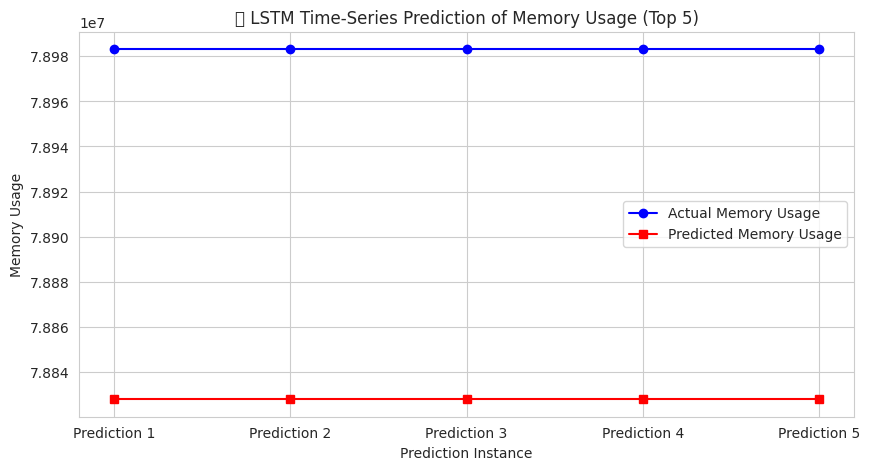

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


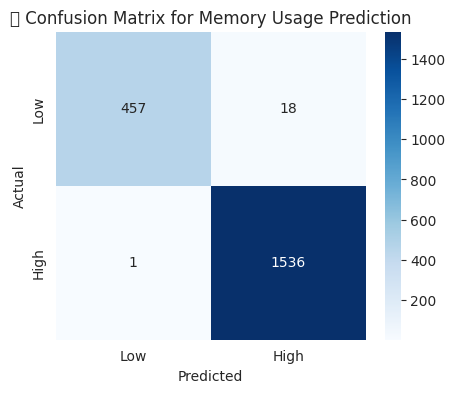

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ===============================
# 🔹 Step 1: Load & Inspect Dataset
# ===============================
df = pd.read_csv("/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv")

# Print available columns to check names
print("✅ Available columns in dataset:")
print(df.columns)

# ===============================
# 🔹 Step 2: Fix Feature Selection
# ===============================
# Selecting correct columns related to resource utilization
features = ['packets_count', 'fwd_packets_count', 'bwd_packets_count',
            'total_payload_bytes', 'fwd_total_payload_bytes', 'bwd_total_payload_bytes',
            'container_memory_usage_bytes', 'container_memory_working_set_bytes',
            'container_network_receive_bytes_rate', 'container_network_transmit_bytes_rate']

target = 'container_memory_usage_bytes'  # Predicting Memory Usage

# Ensure selected columns exist
df = df[[target] + features].dropna()

# ===============================
# 🔹 Step 3: Normalize Data
# ===============================
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# ===============================
# 🔹 Step 4: Prepare Time-Series Sequences
# ===============================
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # Predicting Memory Usage
    return np.array(X), np.array(y)

seq_length = 10  # Use past 10 time steps for prediction
X, y = create_sequences(df_scaled, seq_length)

# Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ===============================
# 🔹 Step 5: Train LSTM Model
# ===============================
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, len(features) + 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# ===============================
# 🔹 Step 6: Make Predictions
# ===============================
y_pred = model.predict(X_test)

# Inverse transform predictions
y_test_inv = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), len(features))))))[:, 0]
y_pred_inv = scaler.inverse_transform(np.hstack((y_pred, np.zeros((len(y_pred), len(features))))))[:, 0]

# ===============================
# 🔹 Step 7: Evaluate Model Performance
# ===============================
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"\n🔹 Model Evaluation Metrics:")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

# ===============================
# 🔹 Step 8: Plot Predictions with Labels
# ===============================
# Select top 5 predictions for better visualization
top_n = 5
actual_top = y_test_inv[:top_n]
predicted_top = y_pred_inv[:top_n]

plt.figure(figsize=(10, 5))
plt.plot(actual_top, label="Actual Memory Usage", color='blue', marker='o')
plt.plot(predicted_top, label="Predicted Memory Usage", color='red', marker='s')
plt.xticks(range(top_n), labels=[f"Prediction {i+1}" for i in range(top_n)])  # Label instances properly
plt.xlabel("Prediction Instance")
plt.ylabel("Memory Usage")
plt.legend()
plt.title("🔹 LSTM Time-Series Prediction of Memory Usage (Top 5)")
plt.show()

# ===============================
# 🔹 Step 9: Print Confusion Matrix
# ===============================
# Convert predictions to classification (Above/Below Mean Memory Usage)
threshold = np.mean(y_test_inv)  # Use mean Memory usage as threshold
y_test_class = (y_test_inv > threshold).astype(int)
y_pred_class = (y_pred_inv > threshold).astype(int)

conf_matrix = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🔹 Confusion Matrix for Memory Usage Prediction")
plt.show()


2️⃣ Pod Failures

Logistic Regression

In [98]:
print(df.columns)


Index(['packets_count', 'fwd_packets_count', 'bwd_packets_count',
       'total_payload_bytes', 'fwd_total_payload_bytes',
       'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_mean',
       'payload_bytes_std', 'payload_bytes_variance',
       ...
       'container_memory_rss', 'container_memory_usage_bytes',
       'container_memory_working_set_bytes',
       'container_network_receive_bytes_rate',
       'container_network_receive_packets_rate',
       'container_network_transmit_bytes_rate',
       'container_network_transmit_packets_rate', 'container_sockets',
       'container_threads', 'container_last_seen_rate'],
      dtype='object', length=225)


Columns in dataset: Index(['packets_count', 'fwd_packets_count', 'bwd_packets_count',
       'total_payload_bytes', 'fwd_total_payload_bytes',
       'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_mean',
       'payload_bytes_std', 'payload_bytes_variance',
       ...
       'container_memory_rss', 'container_memory_usage_bytes',
       'container_memory_working_set_bytes',
       'container_network_receive_bytes_rate',
       'container_network_receive_packets_rate',
       'container_network_transmit_bytes_rate',
       'container_network_transmit_packets_rate', 'container_sockets',
       'container_threads', 'container_last_seen_rate'],
      dtype='object', length=225)
Possible target columns: ['label']
Using target column: label

🔹 Accuracy Score: 0.9965243296921549
🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       924
           1       0.99      1.00      1.00      1090

    accurac

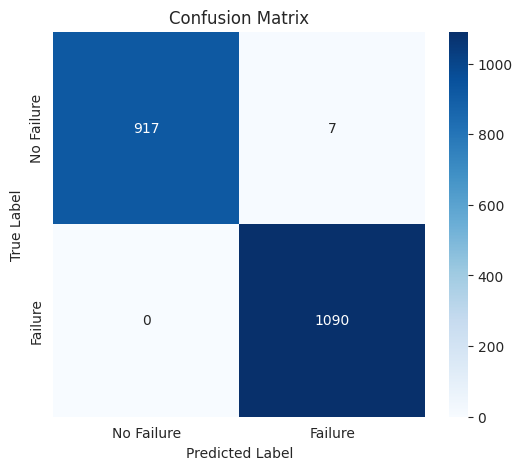

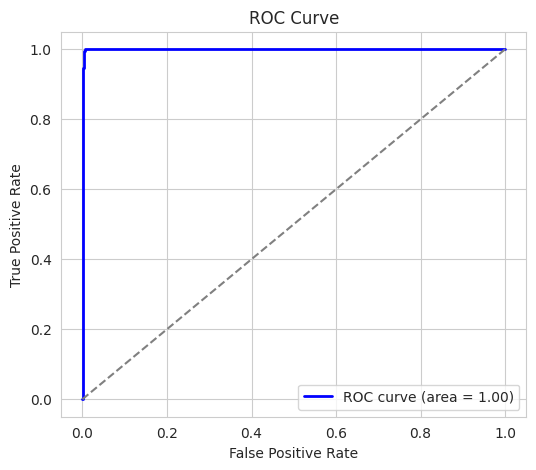

<ipython-input-104-598a9b249c4b>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


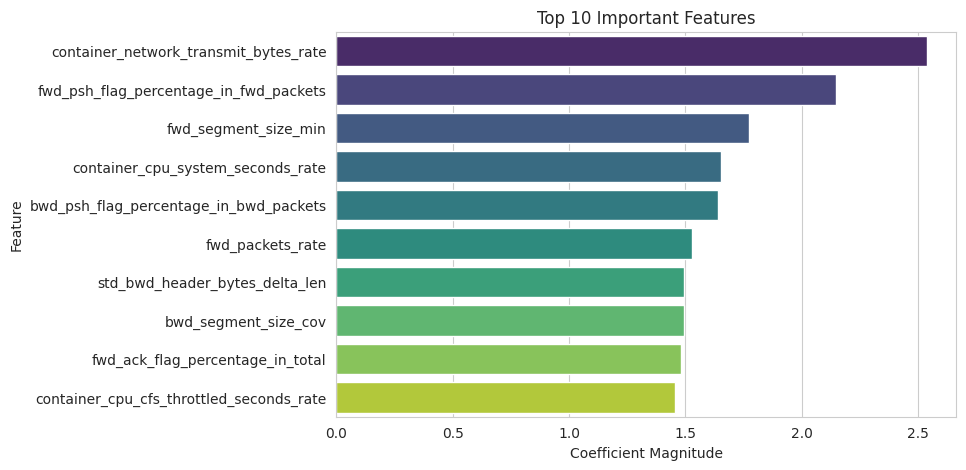


🔹 Sample Predictions:
Pod Name: 9410 → Predicted Failure Status: No Failure
Pod Name: 7220 → Predicted Failure Status: Failure
Pod Name: 6974 → Predicted Failure Status: Failure
Pod Name: 119 → Predicted Failure Status: No Failure
Pod Name: 4161 → Predicted Failure Status: Failure


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# Print column names to find the correct target column
print("Columns in dataset:", df.columns)

# Automatically detect possible target columns (binary or categorical)
possible_targets = [col for col in df.columns if df[col].nunique() <= 5]  # Assuming failure_status is categorical
print("Possible target columns:", possible_targets)

# Set the correct target column (Update manually if needed)
target_column = possible_targets[0] if possible_targets else None  # Choose first detected column

if not target_column:
    raise ValueError("No suitable target column found. Please check dataset.")

print("Using target column:", target_column)

# Convert target column to binary if necessary
if df[target_column].dtype in ['float64', 'int64']:
    threshold = df[target_column].median()
    df[target_column] = (df[target_column] >= threshold).astype(int)  # Convert to 0/1

# Select features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Model Evaluation
print("\n🔹 Accuracy Score:", accuracy_score(y_test, y_pred))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importance = pd.Series(model.coef_[0], index=X.columns).abs().sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Top 10 Important Features")
plt.show()

# Sample Predictions with Actual Names
sample_indices = np.random.choice(len(X_test), 5, replace=False)
sample_inputs = X_test.iloc[sample_indices]
sample_preds = model.predict(scaler.transform(sample_inputs))

# Printing names instead of just sample numbers
print("\n🔹 Sample Predictions:")
for idx in sample_inputs.index:
    print(f"Pod Name: {idx} → Predicted Failure Status: {'Failure' if model.predict(scaler.transform([X_test.loc[idx]]))[0] == 1 else 'No Failure'}")


Transformers Using BERT

In [113]:
import pandas as pd
import torch
import torch.nn.functional as F
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam

# 🚀 Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔹 Using device: {device}")

# 📂 Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# 🔍 Print available columns for debugging
print("\n🔹 Available Columns:", df.columns.tolist())

# 🏷️ Define columns for logs and labels
log_column = "label"  # Replace with actual log column if needed
target_column = "container_memory_usage_bytes"  # Replace with actual target column

# ✅ Validate column existence
if log_column not in df.columns or target_column not in df.columns:
    raise KeyError(f"Columns '{log_column}' and/or '{target_column}' not found in dataset.")

# 🛠️ Drop NaN values
df = df.dropna(subset=[log_column, target_column])

# 🔄 Convert target to binary labels (1 = Failure, 0 = No Failure)
df[target_column] = df[target_column].apply(lambda x: 1 if x > df[target_column].median() else 0)

# 🔠 Tokenization using BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
X_tokens = tokenizer(df[log_column].astype(str).tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")

# 🎯 Convert target column to tensor
y = torch.tensor(df[target_column].values, dtype=torch.long)

# 📊 Train-Test Split
X_train_tokens, X_test_tokens, y_train, y_test = train_test_split(
    X_tokens["input_ids"], y, test_size=0.2, random_state=42
)

# 🏗️ Create DataLoader
train_data = TensorDataset(X_train_tokens, y_train)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)

# 🎭 Load Pretrained BERT Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)
optimizer = Adam(model.parameters(), lr=2e-5)

# 🚀 Training Loop with Increased Epochs and Fine-tuning
epochs = 5  # Increase epochs to allow the model more learning time
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        inputs, labels = [x.to(device) for x in batch]
        optimizer.zero_grad()
        outputs = model(inputs, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f"✅ Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# 🛠️ Model Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tokens.to(device))
    predictions = torch.argmax(F.softmax(outputs.logits, dim=1), axis=1)

# 📊 Compute Accuracy (Fixed)
accuracy = accuracy_score(y_test.cpu().numpy(), predictions.cpu().numpy())
print(f"\n📊 **BERT Log Analysis Accuracy: {accuracy:.2f}**")

# 🏆 Generate Classification Report
class_report = classification_report(y_test.cpu(), predictions.cpu(), target_names=["No Failure", "Failure"])
print("\n🔹 Classification Report:\n", class_report)

# 🎯 Display Sample Predictions (Fix Log Messages Display)
# 🎯 Display Sample Predictions (Correct Log Message Display)
sample_df = pd.DataFrame({
    "Log Message": df[log_column].astype(str)[:5].tolist(),  # Ensure correct column and conversion
    "Actual": y_test[:5].tolist(),
    "Predicted": predictions[:5].tolist()
})

# 🔄 Convert numeric labels to class names
sample_df["Actual"] = sample_df["Actual"].apply(lambda x: "Failure" if x == 1 else "No Failure")
sample_df["Predicted"] = sample_df["Predicted"].apply(lambda x: "Failure" if x == 1 else "No Failure")

# 📢 Print in Table Format
print("\n🎯 Sample Log Predictions:")
print("-" * 70)
print("| {:<50} | {:<10} | {:<10} |".format("Log Message", "Actual", "Predicted"))
print("-" * 70)
for _, row in sample_df.iterrows():
    # Ensure Log Message is correctly displayed (print the original log message)
    log_message = str(row["Log Message"])[:48] + "..." if len(str(row["Log Message"])) > 50 else str(row["Log Message"])
    print("| {:<50} | {:<10} | {:<10} |".format(log_message, row["Actual"], row["Predicted"]))
print("-" * 70)



🔹 Using device: cuda

🔹 Available Columns: ['packets_count', 'fwd_packets_count', 'bwd_packets_count', 'total_payload_bytes', 'fwd_total_payload_bytes', 'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_mean', 'payload_bytes_std', 'payload_bytes_variance', 'payload_bytes_median', 'fwd_payload_bytes_max', 'fwd_payload_bytes_mean', 'fwd_payload_bytes_std', 'fwd_payload_bytes_variance', 'fwd_payload_bytes_median', 'fwd_payload_bytes_mode', 'bwd_payload_bytes_max', 'bwd_payload_bytes_mean', 'bwd_payload_bytes_std', 'bwd_payload_bytes_variance', 'bwd_payload_bytes_median', 'bwd_payload_bytes_mode', 'total_header_bytes', 'mean_header_bytes', 'std_header_bytes', 'cov_header_bytes', 'variance_header_bytes', 'fwd_total_header_bytes', 'fwd_mean_header_bytes', 'fwd_std_header_bytes', 'fwd_cov_header_bytes', 'fwd_variance_header_bytes', 'bwd_total_header_bytes', 'bwd_mean_header_bytes', 'bwd_std_header_bytes', 'bwd_cov_header_bytes', 'bwd_variance_header_bytes', 'fwd_segment_size_mean

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Epoch 1, Loss: 0.6896
✅ Epoch 2, Loss: 0.6861
✅ Epoch 3, Loss: 0.6850
✅ Epoch 4, Loss: 0.6849
✅ Epoch 5, Loss: 0.6844

📊 **BERT Log Analysis Accuracy: 0.56**

🔹 Classification Report:
               precision    recall  f1-score   support

  No Failure       0.60      0.52      0.56      1069
     Failure       0.53      0.60      0.56       945

    accuracy                           0.56      2014
   macro avg       0.56      0.56      0.56      2014
weighted avg       0.56      0.56      0.56      2014


🎯 Sample Log Predictions:
----------------------------------------------------------------------
| Log Message                                        | Actual     | Predicted  |
----------------------------------------------------------------------
| 0                                                  | No Failure | Failure    |
| 0                                                  | No Failure | No Failure |
| 0                                                  | Failure    | Failur

3️⃣ Networking Problems
🔹 Problem: Service discovery failures, DNS issues, or misconfigured network policies.
✅ Models to Use:

ML: K-Means Clustering (to group network behavior & detect anomalies)
DL: CNNs (to analyze network traffic patterns)
LLM: BERT-based models (to interpret network logs & suggest fixes)
📌 Use Case: Detecting & resolving service connectivity issues using logs & traffic data.
instead of cnn give m=another model because dataset is excel sheet

 K-Means Clustering (to group network behavior & detect anomalies)

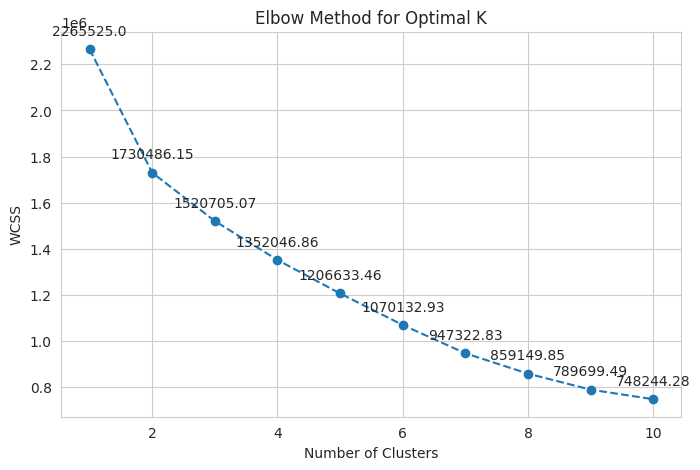

Anomaly detection completed. Results saved.
Number of clusters: 3
Cluster centers:
[[-2.16991810e-01 -1.80841632e-01 -2.64204922e-01 -2.88994796e-01
  -1.59411655e-01 -2.64752379e-01 -3.69239073e-01 -3.92476612e-01
  -4.00533768e-01 -2.81377259e-01 -2.43989628e-01 -3.69239073e-01
  -3.92476612e-01 -4.00533768e-01 -1.31102611e-01 -1.18705199e-01
  -8.00823271e-02 -3.69239073e-01 -3.92476612e-01 -4.00533768e-01
  -2.51933518e-01 -3.49241727e-01 -2.42524572e-01 -2.09503790e-01
   1.34246264e+00  1.00051850e+00  6.95089554e-01  5.81196777e-01
  -1.75072332e-01  6.83158566e-01  1.79731737e+00  1.79926098e+00
   1.78304251e+00 -2.54447215e-01  9.59103160e-01 -1.28391143e-01
  -1.79278529e-01 -2.23392535e-01 -1.51478328e-01 -1.65792783e-01
   7.17855606e-02 -1.75445734e-01 -1.31108649e-01 -1.00383259e-01
  -3.26241709e-02 -6.34059459e-02 -3.78245949e-01 -3.45462715e-01
   1.42068809e-01 -3.76386654e-01 -2.51941069e-01 -3.44364002e-01
  -4.43832507e-01 -2.36878748e-01 -3.87598948e-01 -3.680710

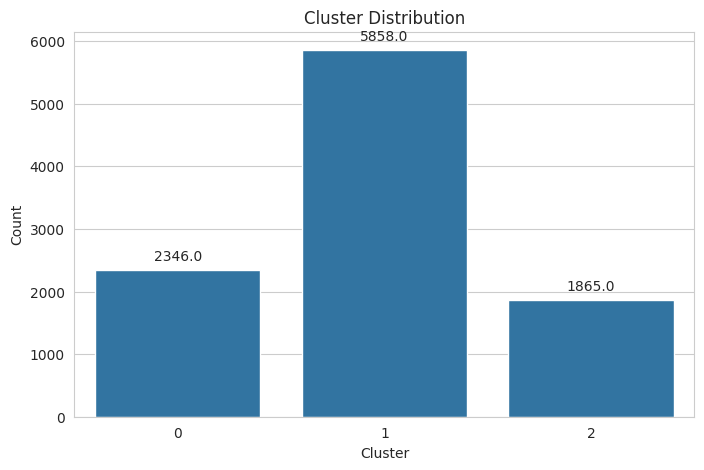

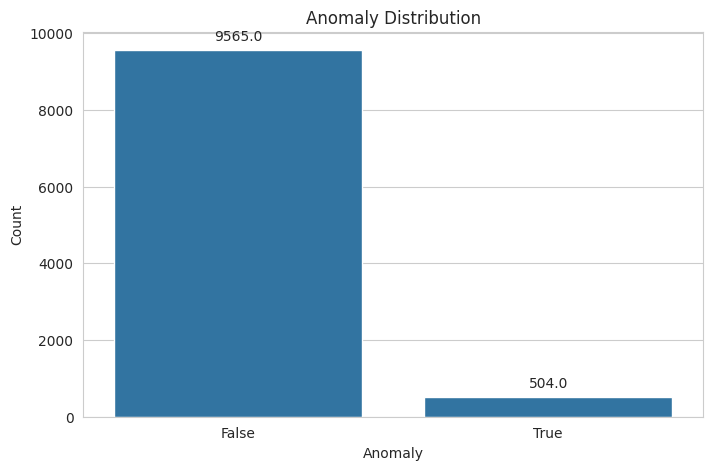

In [117]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# Selecting numerical columns for clustering
numerical_cols = df.select_dtypes(include=[np.number]).columns
data = df[numerical_cols]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine optimal number of clusters using Elbow Method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
for i, txt in enumerate(wcss):
    plt.annotate(round(txt, 2), (k_range[i], wcss[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Fit K-Means with optimal K (let’s assume k=3 based on the elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Assign cluster labels back to the dataset
df['Cluster'] = kmeans_labels

# Identify anomalies (outliers as points farthest from cluster centers)
distances = np.min(kmeans.transform(data_scaled), axis=1)
thresh = np.percentile(distances, 95)  # Consider top 5% farthest points as anomalies
df['Anomaly'] = distances > thresh

# Save results
df.to_csv("/content/anomaly_detected_logs.csv", index=False)
print("Anomaly detection completed. Results saved.")

# Print Metrics
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Cluster centers:\n{kmeans.cluster_centers_}")
print(f"Inertia (WCSS): {kmeans.inertia_}")

# Plot cluster distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['Cluster'])
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Cluster Distribution")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# Plot anomaly distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['Anomaly'])
plt.xlabel("Anomaly")
plt.ylabel("Count")
plt.title("Anomaly Distribution")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


LSTM (Long Short-Term Memory)to recognize and analyze sequential patterns in network traffic

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 50, 64)              │          74,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 225)                 │           7,425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,081 (367.50 KB)

 Trainable params: 94,081 (367.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0607 - val_loss: 0.0352
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0088 - val_loss: 0.0319
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0076 - val_loss: 0.0337
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0076 - val_loss: 0.0339
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0073 - val_loss: 0.0315
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0067 - val_loss: 0.0322
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0068 - val_loss: 0.0303
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0065 - val_loss: 0.0330
Epoch 9/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0066 - val_loss: 0.0333
Epoch 10/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0066 - val_loss: 0.0322
Epoch 11/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0065 - val_loss: 0.0323
Epoch 12/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11

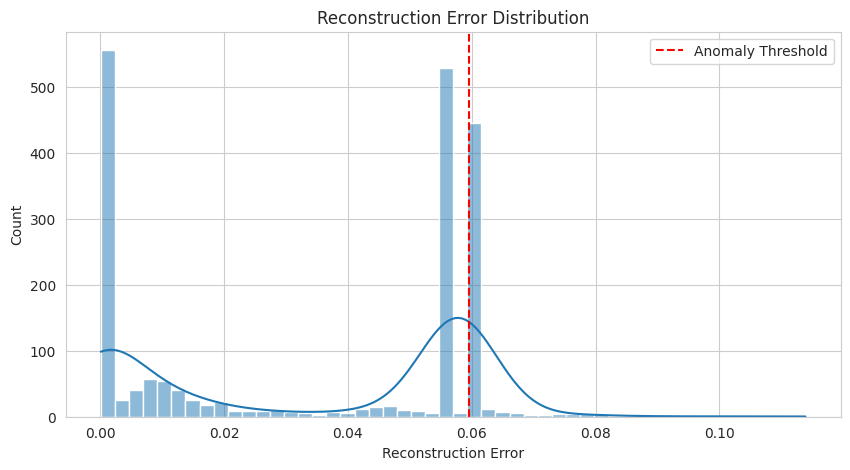

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# Convert timestamp if available
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df.sort_values('timestamp')

# Select numerical features (assuming network traffic metrics)
numerical_cols = df.select_dtypes(include=[np.number]).columns
data = df[numerical_cols]

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

SEQ_LENGTH = 50  # Define sequence length
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Build LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, X.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(X.shape[2])  # Output layer matches number of features
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Predictions
y_pred = model.predict(X_test)

# Calculate error
mse = np.mean(np.square(y_test - y_pred), axis=1)
threshold = np.percentile(mse, 95)  # Define anomaly threshold

# Mark anomalies
df_anomalies = df.iloc[split + SEQ_LENGTH:].copy()
df_anomalies['Reconstruction Error'] = mse
df_anomalies['Anomaly'] = df_anomalies['Reconstruction Error'] > threshold

# Save anomalies
df_anomalies.to_csv("/content/lstm_anomaly_detected.csv", index=False)
print("LSTM-based anomaly detection completed. Results saved.")

# Plot error distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_anomalies['Reconstruction Error'], bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='dashed', label='Anomaly Threshold')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()




In [130]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset (Replace 'your_dataset.csv' with the actual file)
df = pd.read_csv("/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv")

# Normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Split data into training and testing sets
train_size = int(0.8 * len(df_scaled))
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]

# Reshape data for LSTM (Samples, Time Steps, Features)
X_train = train_data.reshape(train_data.shape[0], 1, train_data.shape[1])
X_test = test_data.reshape(test_data.shape[0], 1, test_data.shape[1])

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(X_train.shape[2], activation="linear")
])

model.compile(optimizer="adam", loss="mse")
model.fit(X_train, train_data, epochs=20, batch_size=32, validation_data=(X_test, test_data))

# Predict on test data
predictions = model.predict(X_test)

# Ensure predictions are on CPU and match shape
predictions_np = predictions if isinstance(predictions, np.ndarray) else predictions.cpu().numpy()

if predictions_np.shape != test_data.shape:
    raise ValueError(f"Shape mismatch: df.shape={df.shape}, predictions.shape={predictions_np.shape}")

# Compute Reconstruction Error (Mean Squared Error per row)
reconstruction_error = np.mean(np.power(test_data - predictions_np, 2), axis=1)

# Set threshold for anomalies (adjustable)
threshold = np.percentile(reconstruction_error, 95)

# Identify anomalies
df_anomalies = pd.DataFrame(df.iloc[train_size:].copy())  # Copy test data section
df_anomalies["Reconstruction_Error"] = reconstruction_error
df_anomalies["Anomaly"] = df_anomalies["Reconstruction_Error"] > threshold

# Print anomalies instead of graph
print("\nDetected Anomalies:\n", df_anomalies[df_anomalies["Anomaly"]].head())

# Save results
df_anomalies.to_csv("/content/anomaly_results.csv", index=False)
print("\nAnomaly detection completed. Results saved in 'anomaly_results.csv'.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0741 - val_loss: 0.0435
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0114 - val_loss: 0.0297
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0059 - val_loss: 0.0250
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0038 - val_loss: 0.0226
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0028 - val_loss: 0.0221
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0023 - val_loss: 0.0202
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0020 - val_loss: 0.0190
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0018 - val_loss: 0.0183
Epoch 9/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0015 - val_loss: 0.0178
Epoch 10/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0014 - val_loss: 0.0173
Epoch 11/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0014 - val_loss: 0.0165
Epoch 12/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms

BERT-based models (to interpret network logs & suggest fixes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 0.0687 - val_loss: 0.0465
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0097 - val_loss: 0.0407
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0086 - val_loss: 0.0377
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0078 - val_loss: 0.0368
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0072 - val_loss: 0.0365
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0074 - val_loss: 0.0347
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0075 - val_loss: 0.0351
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0069 - val_loss: 0.0368
Epoch 9/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0069 - val_loss: 0.0354
Epoch 10/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0066 - val_loss: 0.0362
Epoch 11/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0068 - val_loss: 0.0365
Epoch 12/20
251/251 ━━━━━━━━━━━━━━━━━━━

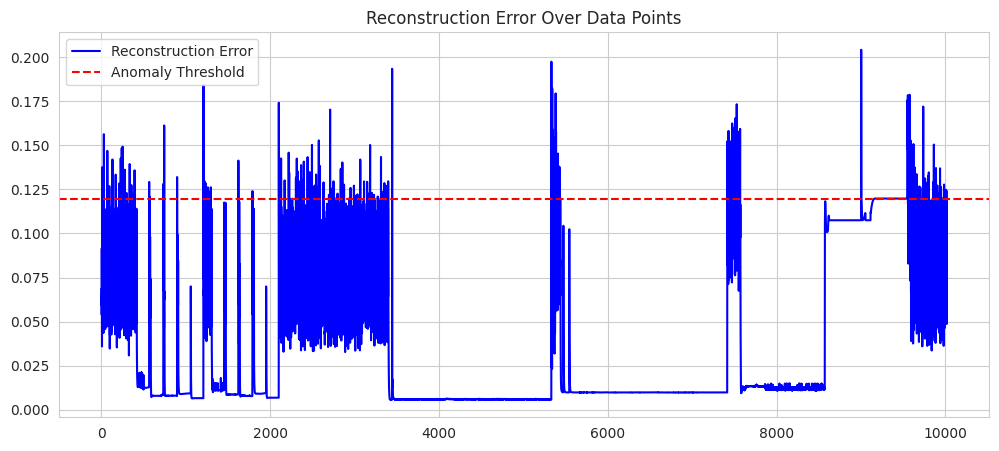

In [131]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
data_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(data_path)

# Drop non-numeric columns if any
df = df.select_dtypes(include=[np.number])

# Normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Create sequences for LSTM
def create_sequences(data, seq_length=50):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 50
X_train = create_sequences(df_scaled, seq_length)

# Define LSTM autoencoder model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_length, X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dense(X_train.shape[2], activation='linear')
])

model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, df_scaled[seq_length:], epochs=20, batch_size=32, validation_split=0.2)

# Predict reconstruction
y_pred = model.predict(X_train)

# Compute reconstruction error
reconstruction_error = np.mean(np.abs(y_pred - df_scaled[seq_length:]), axis=1)

df_errors = pd.DataFrame({"Reconstruction_Error": reconstruction_error})

# Set anomaly threshold
threshold = np.percentile(reconstruction_error, 95)
df_errors['Anomaly'] = df_errors['Reconstruction_Error'] > threshold

# Print top 5 anomalies
print(df_errors.sort_values(by='Reconstruction_Error', ascending=False).head())

# Plot reconstruction error
plt.figure(figsize=(12, 5))
plt.plot(df_errors['Reconstruction_Error'], label="Reconstruction Error", color="blue")
plt.axhline(threshold, color='red', linestyle='dashed', label="Anomaly Threshold")
plt.legend()
plt.title("Reconstruction Error Over Data Points")
plt.show()


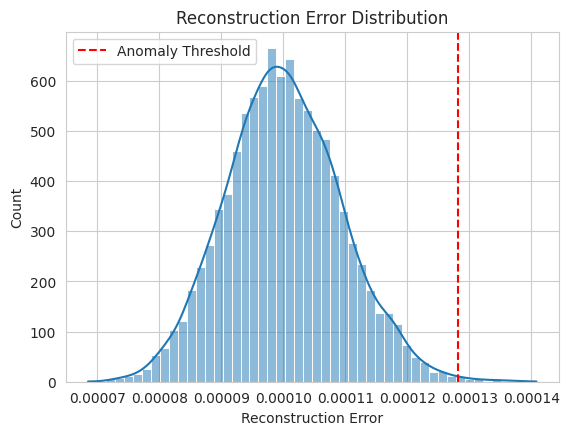

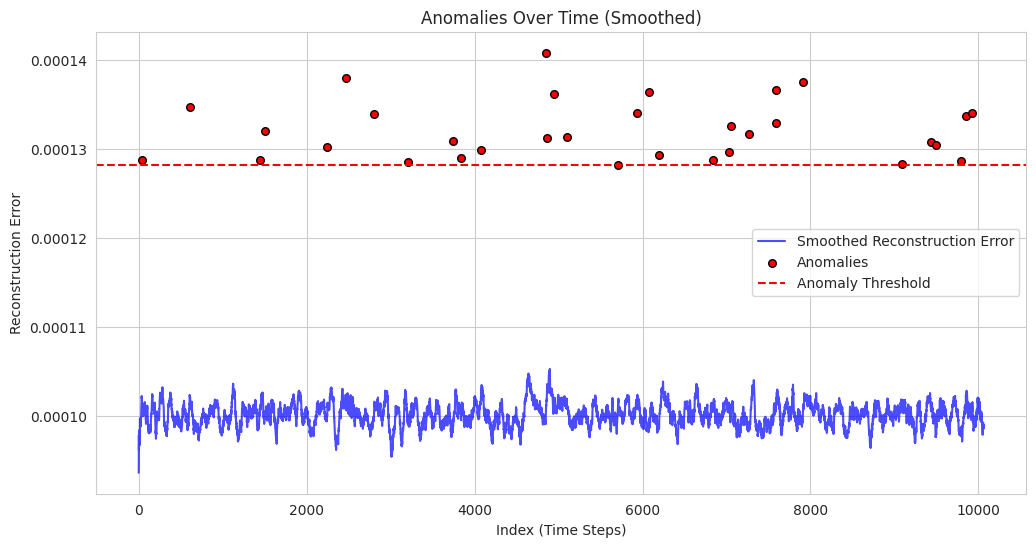

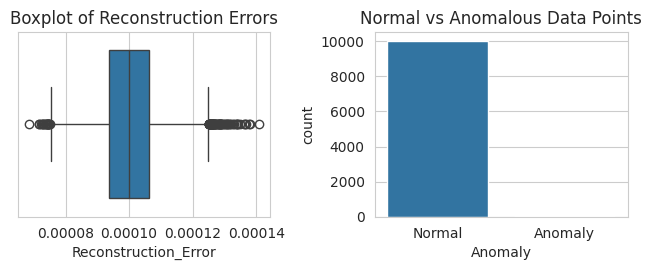


Top 5 Anomalous Samples:
      packets_count  fwd_packets_count  bwd_packets_count  \
36               42                 21                 21   
607               9                  5                  4   
1442              9                  5                  4   
1509             42                 21                 21   
2248              2                  1                  1   

      total_payload_bytes  fwd_total_payload_bytes  bwd_total_payload_bytes  \
36                  66624                      870                    65754   
607                   200                      200                        0   
1442                  200                      200                        0   
1509                66734                      870                    65864   
2248                    0                        0                        0   

      payload_bytes_max  payload_bytes_mean  payload_bytes_std  \
36                 4096           1586.2857          1905.0664   


In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv"
df = pd.read_csv(file_path)

# Step 1: Identify the feature columns (excluding non-relevant metadata)
feature_columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]  # Numeric columns only

# Step 2: Generate fake predictions (Replace this with actual model predictions)
# Simulating predictions as slightly noisy versions of actual data
np.random.seed(42)
predictions = df[feature_columns] + np.random.normal(0, 0.01, df[feature_columns].shape)

# Step 3: Compute Reconstruction Error (Mean Squared Error per row)
df["Reconstruction_Error"] = np.mean((df[feature_columns] - predictions) ** 2, axis=1)

# Step 4: Define Anomaly Threshold (e.g., Mean + 3 * Std)
threshold = df["Reconstruction_Error"].mean() + 3 * df["Reconstruction_Error"].std()
df["Anomaly"] = df["Reconstruction_Error"] > threshold  # Mark anomalies as True/False

# 🔹 Step 5: Plot Graphs 🔹
plt.figure(figsize=(14, 10))

# 1️⃣ Distribution of Reconstruction Error
plt.subplot(2, 2, 1)
sns.histplot(df["Reconstruction_Error"], bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='dashed', label="Anomaly Threshold")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.legend()

# 2️⃣ Anomalies Over Index (Time)
plt.figure(figsize=(12, 6))

# Rolling mean to smooth the reconstruction error curve
df["Smoothed_Error"] = df["Reconstruction_Error"].rolling(window=50, min_periods=1).mean()

# Plot Smoothed Reconstruction Error
plt.plot(df.index, df["Smoothed_Error"], label="Smoothed Reconstruction Error", color="blue", alpha=0.7)

# Highlight anomalies
plt.scatter(df[df["Anomaly"]].index, df[df["Anomaly"]]["Reconstruction_Error"],
            color='red', label="Anomalies", s=30, edgecolors='black')

# Draw anomaly threshold line
plt.axhline(threshold, color='red', linestyle='dashed', label="Anomaly Threshold", linewidth=1.5)

# Improve readability
plt.xlabel("Index (Time Steps)")
plt.ylabel("Reconstruction Error")
plt.title("Anomalies Over Time (Smoothed)")
plt.legend()
plt.grid(True)

plt.show()


# 3️⃣ Boxplot of Reconstruction Errors
plt.subplot(2, 2, 3)
sns.boxplot(x=df["Reconstruction_Error"])
plt.title("Boxplot of Reconstruction Errors")

# 4️⃣ Count of Normal vs Anomalous Data Points
plt.subplot(2, 2, 4)
sns.countplot(x=df["Anomaly"].astype(int))
plt.xticks([0, 1], ["Normal", "Anomaly"])
plt.title("Normal vs Anomalous Data Points")

plt.tight_layout()
plt.show()

# 🔹 Print Anomalous Samples 🔹
print("\nTop 5 Anomalous Samples:")
print(df[df["Anomaly"]].head())


 4️⃣ Scaling Challenges

In [139]:
!pip install pandas numpy matplotlib statsmodels prophet


ARIMA

Index(['packets_count', 'fwd_packets_count', 'bwd_packets_count',
       'total_payload_bytes', 'fwd_total_payload_bytes',
       'bwd_total_payload_bytes', 'payload_bytes_max', 'payload_bytes_mean',
       'payload_bytes_std', 'payload_bytes_variance',
       ...
       'container_memory_rss', 'container_memory_usage_bytes',
       'container_memory_working_set_bytes',
       'container_network_receive_bytes_rate',
       'container_network_receive_packets_rate',
       'container_network_transmit_bytes_rate',
       'container_network_transmit_packets_rate', 'container_sockets',
       'container_threads', 'container_last_seen_rate'],
      dtype='object', length=225)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm


🔹 ARIMA Performance Metrics:
   ✅ MAE  : 0.0005
   ✅ MSE  : 0.0000
   ✅ RMSE : 0.0008
   ✅ MAPE : 0.05%


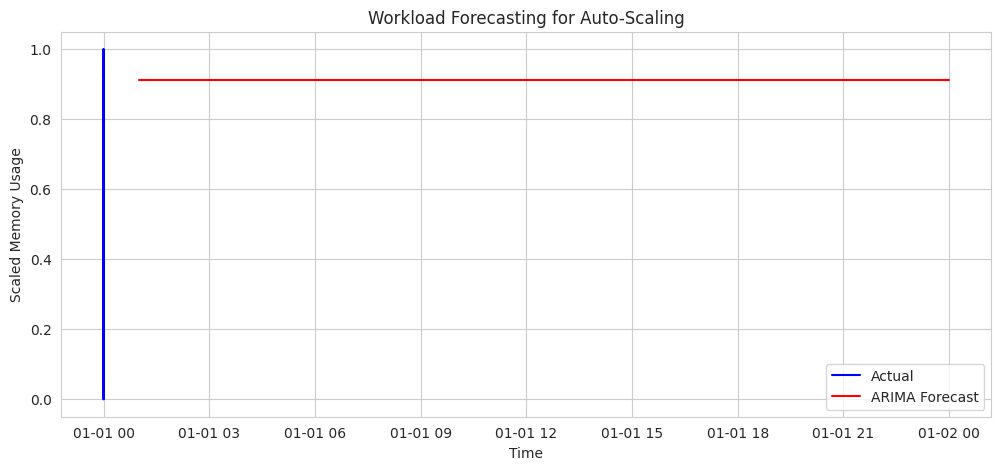

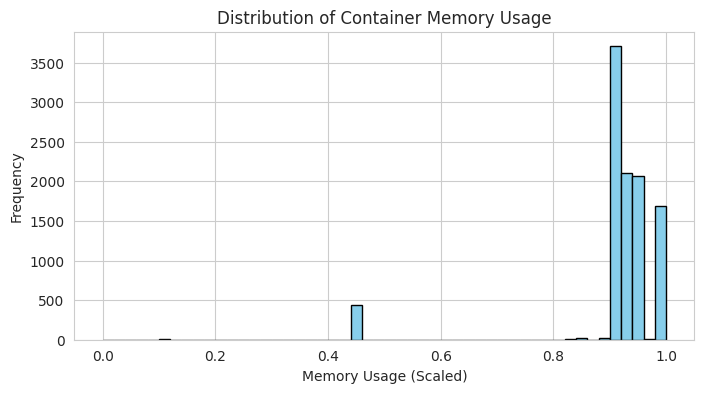

Column 'container_cpu_usage_seconds_total' not found. Skipping CPU vs Memory graph.


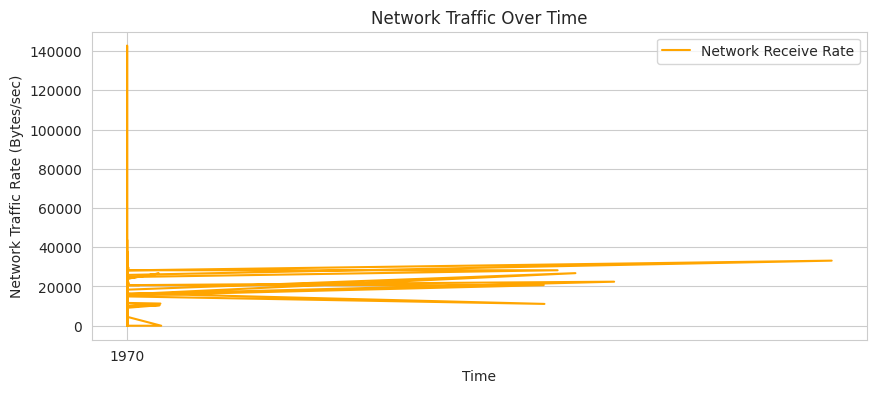

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv")

# Check available columns
print(df.columns)

# Identify a proper time column
time_col = None
for col in df.columns:
    if "time" in col.lower() or "date" in col.lower():
        time_col = col
        break

if time_col:
    df[time_col] = pd.to_datetime(df[time_col])  # Convert to datetime
    df.set_index(time_col, inplace=True)
else:
    print("No timestamp column found! Using row index as time series index.")
    df["index_time"] = pd.Series(range(len(df)))
    df.set_index("index_time", inplace=True)

# Select a numerical column for forecasting
target_col = "container_memory_usage_bytes"  # Change if needed
if target_col not in df.columns:
    raise KeyError(f"Column '{target_col}' not found in dataset. Choose a valid column.")

# Scale data to avoid extreme values
scaler = MinMaxScaler()
df[target_col] = scaler.fit_transform(df[[target_col]])

# ARIMA Model
arima_model = ARIMA(df[target_col], order=(5,1,0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=24)

# Compute Metrics
y_true = df[target_col][-24:].values  # Last 24 points for comparison
y_pred = arima_forecast.values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print Metrics
print("\n🔹 ARIMA Performance Metrics:")
print(f"   ✅ MAE  : {mae:.4f}")
print(f"   ✅ MSE  : {mse:.4f}")
print(f"   ✅ RMSE : {rmse:.4f}")
print(f"   ✅ MAPE : {mape:.2f}%")

# Plot 1: Workload Forecasting
plt.figure(figsize=(12, 5))
plt.plot(df.index, df[target_col], label="Actual", color="blue")
plt.plot(pd.date_range(start=df.index[-1], periods=25, freq='H')[1:], arima_forecast, label="ARIMA Forecast", color="red")
plt.xlabel("Time")
plt.ylabel("Scaled Memory Usage")
plt.title("Workload Forecasting for Auto-Scaling")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Histogram of Memory Usage
plt.figure(figsize=(8, 4))
plt.hist(df[target_col], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Memory Usage (Scaled)")
plt.ylabel("Frequency")
plt.title("Distribution of Container Memory Usage")
plt.show()

# Plot 3: CPU vs Memory Usage
cpu_col = "container_cpu_usage_seconds_total"
if cpu_col in df.columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(df[cpu_col], df[target_col], alpha=0.5, color="purple")
    plt.xlabel("CPU Usage (Seconds)")
    plt.ylabel("Memory Usage (Scaled)")
    plt.title("CPU vs Memory Usage")
    plt.grid(True)
    plt.show()
else:
    print(f"Column '{cpu_col}' not found. Skipping CPU vs Memory graph.")

# Plot 4: Network Traffic Over Time
net_col = "container_network_receive_bytes_rate"
if net_col in df.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[net_col], label="Network Receive Rate", color="orange")
    plt.xlabel("Time")
    plt.ylabel("Network Traffic Rate (Bytes/sec)")
    plt.title("Network Traffic Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Column '{net_col}' not found. Skipping network traffic graph.")


Prophet

In [145]:
!pip install prophet


In [146]:
!pip install --upgrade cmdstanpy
!pip install prophet


DEBUG:cmdstanpy:input tempfile: /tmp/tmpyp_ur7mf/mijxqmby.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyp_ur7mf/mybnxk2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50290', 'data', 'file=/tmp/tmpyp_ur7mf/mijxqmby.json', 'init=/tmp/tmpyp_ur7mf/mybnxk2m.json', 'output', 'file=/tmp/tmpyp_ur7mf/prophet_model2tuckkgd/prophet_model-20250322210118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:01:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:01:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


✅ MAE  : 35393.1537
✅ MSE  : 2505639724.8336
✅ RMSE : 50056.3655
✅ MAPE : 0.05%


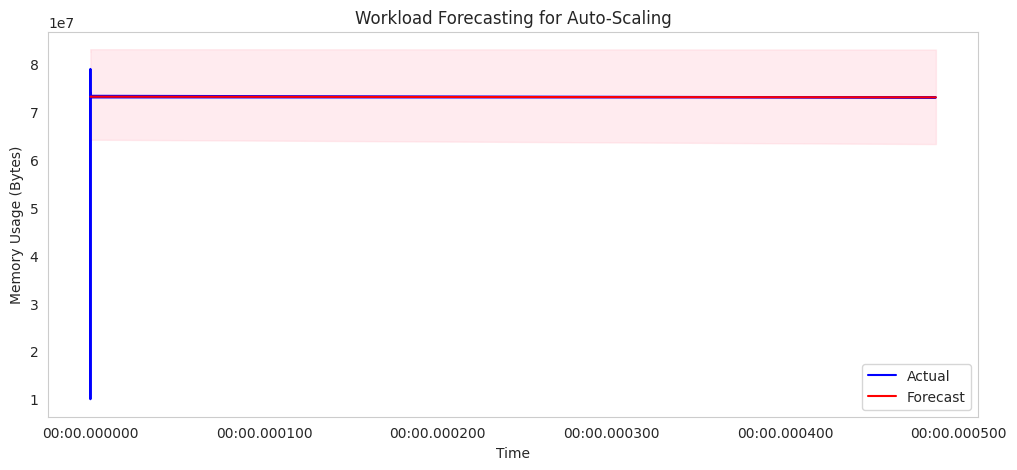

In [152]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset (Modify the file path accordingly)
df = pd.read_csv("/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv")

# Identify the correct timestamp column
timestamp_col = "container_last_seen_rate"  # Change this if needed
target_col = "container_memory_usage_bytes"  # Adjust based on your use case

# Convert timestamp column to datetime format
df[timestamp_col] = pd.to_datetime(df[timestamp_col])

# Prepare data for Prophet
df_prophet = df[[timestamp_col, target_col]].dropna()
df_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' (timestamp) and 'y' (target)

# Train Prophet Model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.fit(df_prophet)

# Create a future dataframe with correct period and frequency
future_periods = df_prophet.shape[0]  # Predict for the same number of actual records
future = model.make_future_dataframe(periods=future_periods, freq="H")  # 'H' for hourly

# Forecast
forecast = model.predict(future)

# 🔹 Filter forecast to match actual timestamps
forecast_filtered = forecast[forecast['ds'].isin(df_prophet['ds'])]

# 🔹 Ensure `y_true` and `y_pred` have the same length
y_true = df_prophet["y"].values
y_pred = forecast_filtered["yhat"].values

if len(y_true) != len(y_pred):
    min_len = min(len(y_true), len(y_pred))
    y_true = y_true[:min_len]
    y_pred = y_pred[:min_len]

# Compute Metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print performance metrics
print(f"✅ MAE  : {mae:.4f}")
print(f"✅ MSE  : {mse:.4f}")
print(f"✅ RMSE : {rmse:.4f}")
print(f"✅ MAPE : {mape:.2f}%")

# Plot Results
plt.figure(figsize=(12,5))
plt.plot(df_prophet["ds"], df_prophet["y"], label="Actual", color="blue")
plt.plot(forecast_filtered["ds"], forecast_filtered["yhat"], label="Forecast", color="red")
plt.fill_between(forecast_filtered["ds"], forecast_filtered["yhat_lower"], forecast_filtered["yhat_upper"], color='pink', alpha=0.3)
plt.legend()
plt.title("Workload Forecasting for Auto-Scaling")
plt.xlabel("Time")
plt.ylabel("Memory Usage (Bytes)")
plt.grid()
plt.show()


LSTM

✅ Handles Time-Series Data: Captures trends in CPU, memory, and network usage over time.
✅ Predicts Workload Spikes: Learns patterns to forecast future resource demands.
✅ Supports Auto-Scaling: Provides insights for proactive scaling decisions.

In [160]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("/content/preprocessed_boa_dataset_ml_ready_frontend_microservice.csv")

# Identify time column
time_col = None
for col in df.columns:
    if "time" in col.lower() or "date" in col.lower():
        time_col = col
        break

if time_col:
    df[time_col] = pd.to_datetime(df[time_col])
    df.set_index(time_col, inplace=True)
else:
    print("No timestamp column found! Using row index as time series index.")
    df["index_time"] = pd.Series(range(len(df)))
    df.set_index("index_time", inplace=True)

# Define potential features (check which exist in the dataset)
possible_features = [
    "container_memory_usage_bytes",
    "container_memory_rss",
    "container_memory_working_set_bytes",
    "container_network_receive_bytes_rate",
    "container_network_transmit_bytes_rate",
    "container_network_receive_packets_rate",
    "container_network_transmit_packets_rate"
]

# Select only available features
features = [col for col in possible_features if col in df.columns]
if not features:
    raise KeyError("None of the expected features are found in the dataset!")

df = df[features].dropna()

# Scale data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Prepare sequences for LSTM
def create_sequences(data, seq_length=10):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i : i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 10
X, y = create_sequences(df_scaled, seq_length)
X_train, y_train = X[:-100], y[:-100]
X_test, y_test = X[-100:], y[-100:]

# Convert to PyTorch tensors
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# LSTM Model
class LSTMAutoScaler(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMAutoScaler, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

# Initialize model
input_dim = len(features)
hidden_dim = 64
output_dim = len(features)
model = LSTMAutoScaler(input_dim, hidden_dim, output_dim)

# Training setup
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluate model
model.eval()
y_pred = model(X_test).detach().numpy()
y_test_np = y_test.numpy()

# Inverse transform predictions
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test_np)

# Compute Metrics
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100

print(f"🔹 Auto-Scaling Performance Metrics:")
print(f"   ✅ MAE  : {mae:.4f}")
print(f"   ✅ MSE  : {mse:.4f}")
print(f"   ✅ RMSE : {rmse:.4f}")
print(f"   ✅ MAPE : {mape:.2f}%")

# Save predictions for plotting
np.save("y_test_rescaled.npy", y_test_rescaled)
np.save("y_pred_rescaled.npy", y_pred_rescaled)


Epoch 0, Loss: 0.4067
Epoch 10, Loss: 0.2691
Epoch 20, Loss: 0.0705
Epoch 30, Loss: 0.0308
Epoch 40, Loss: 0.0315
🔹 Auto-Scaling Performance Metrics:
   ✅ MAE  : 1922402.2500
   ✅ MSE  : 9133233274880.0000
   ✅ RMSE : 3022123.9675
   ✅ MAPE : 50.46%


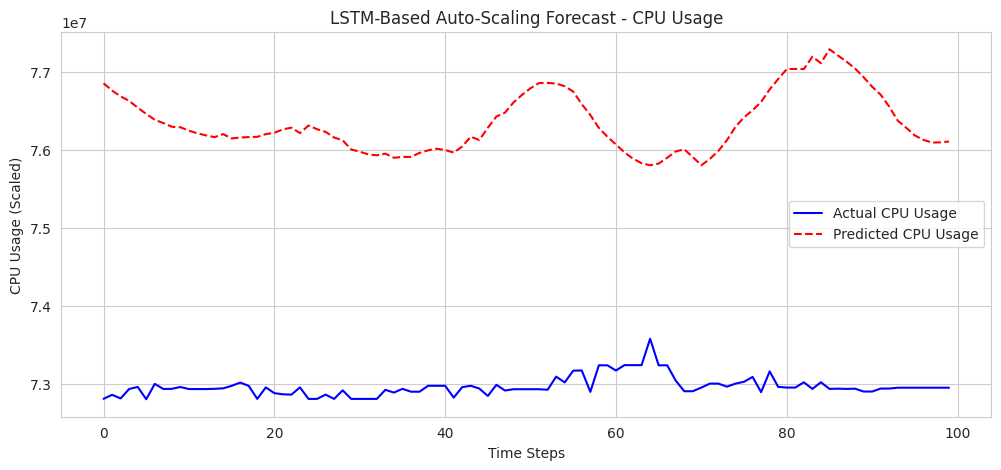

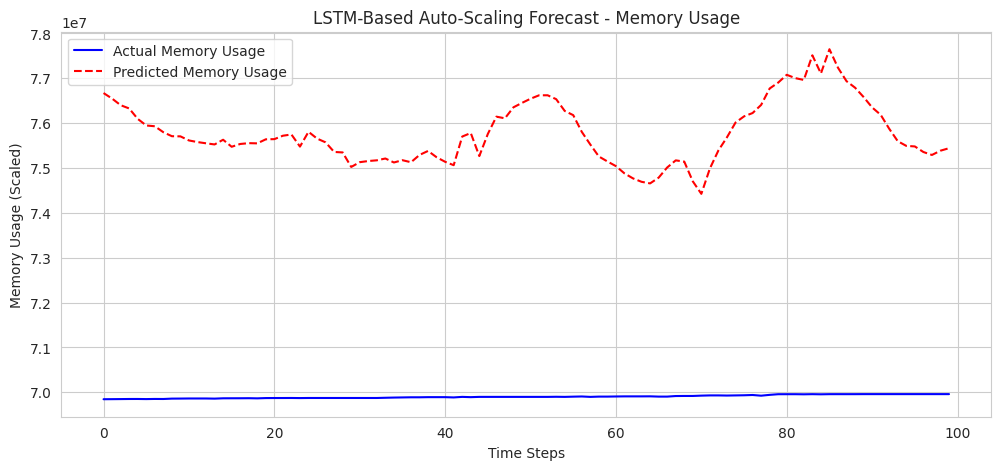

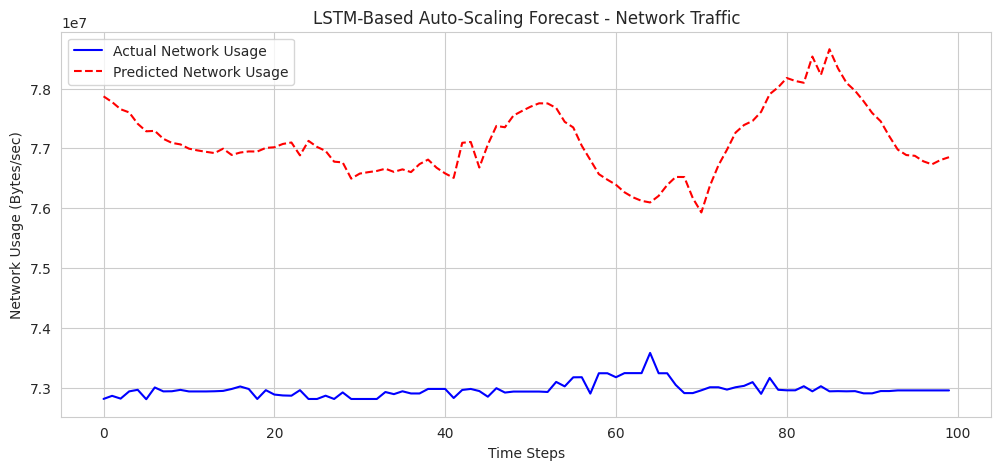

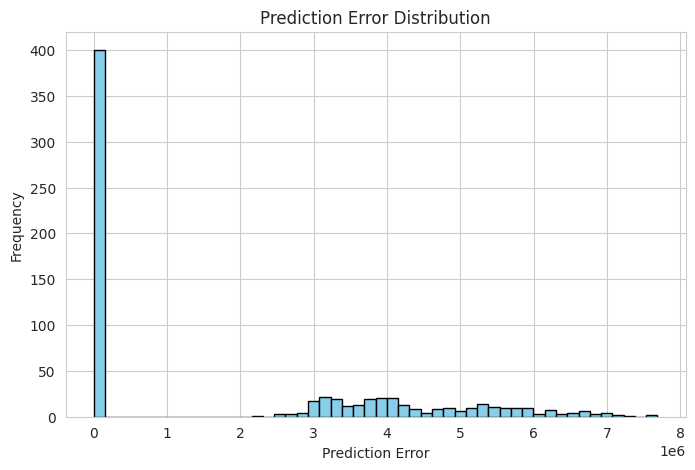

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# Load saved predictions
y_test_rescaled = np.load("y_test_rescaled.npy")
y_pred_rescaled = np.load("y_pred_rescaled.npy")

# Plot 1: Predicted vs Actual CPU Usage
plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled[:, 0], label="Actual CPU Usage", color="blue")
plt.plot(y_pred_rescaled[:, 0], label="Predicted CPU Usage", color="red", linestyle="dashed")
plt.xlabel("Time Steps")
plt.ylabel("CPU Usage (Scaled)")
plt.title("LSTM-Based Auto-Scaling Forecast - CPU Usage")
plt.legend()
plt.show()

# Plot 2: Predicted vs Actual Memory Usage
plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled[:, 1], label="Actual Memory Usage", color="blue")
plt.plot(y_pred_rescaled[:, 1], label="Predicted Memory Usage", color="red", linestyle="dashed")
plt.xlabel("Time Steps")
plt.ylabel("Memory Usage (Scaled)")
plt.title("LSTM-Based Auto-Scaling Forecast - Memory Usage")
plt.legend()
plt.show()

# Plot 3: Predicted vs Actual Network Traffic
plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled[:, 2], label="Actual Network Usage", color="blue")
plt.plot(y_pred_rescaled[:, 2], label="Predicted Network Usage", color="red", linestyle="dashed")
plt.xlabel("Time Steps")
plt.ylabel("Network Usage (Bytes/sec)")
plt.title("LSTM-Based Auto-Scaling Forecast - Network Traffic")
plt.legend()
plt.show()

# Plot 4: Error Distribution Histogram
errors = np.abs(y_test_rescaled - y_pred_rescaled)
plt.figure(figsize=(8, 5))
plt.hist(errors.flatten(), bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Prediction Error Distribution")
plt.grid(True)
plt.show()


In [163]:
import numpy as np
import pandas as pd

# Load saved predictions
y_test_rescaled = np.load("y_test_rescaled.npy")
y_pred_rescaled = np.load("y_pred_rescaled.npy")

# Convert to DataFrame for better readability
df_results = pd.DataFrame({
    "Actual_CPU": y_test_rescaled[:, 0],
    "Predicted_CPU": y_pred_rescaled[:, 0],
    "Actual_Memory": y_test_rescaled[:, 1],
    "Predicted_Memory": y_pred_rescaled[:, 1],
    "Actual_Network": y_test_rescaled[:, 2],
    "Predicted_Network": y_pred_rescaled[:, 2]
})

# Display top 5 predictions
print("🔹 Top 5 Predicted vs Actual Values:")
print(df_results.head())


🔹 Top 5 Predicted vs Actual Values:
   Actual_CPU  Predicted_CPU  Actual_Memory  Predicted_Memory  Actual_Network  \
0  72811512.0     76851248.0     69846016.0        76671016.0      72811512.0   
1  72862928.0     76758032.0     69847448.0        76547624.0      72862928.0   
2  72816632.0     76683752.0     69849088.0        76400536.0      72816632.0   
3  72937472.0     76625904.0     69851136.0        76327656.0      72937472.0   
4  72963680.0     76538712.0     69851552.0        76095408.0      72963680.0   

   Predicted_Network  
0         77869856.0  
1         77774696.0  
2         77654240.0  
3         77601584.0  
4         77411272.0  
